In [37]:
import matplotlib.pyplot as plt
import pandas as pd
from numpy.fft import fft, ifft
import numpy as np
import scipy
import seaborn as sns

#IMPORTING FUNCTIONS FOR CLASSIFIERS
from sklearn.preprocessing import StandardScaler

#IMPORTING FUNCTIONS FROM ./defs

from defs import defs_copy as defs_

from matplotlib.colors import LinearSegmentedColormap

In [46]:
color_values = np.array([0, 0.1, 0.4, 0.6, 0.9, 1])
color_names = ["crimson", "royalblue", "darkblue", "darkblue", "royalblue", "crimson"]

cMap = list(zip(color_values, color_names))
customColourMap = LinearSegmentedColormap.from_list("pri_f", cMap)

# if mpl >= 3.5
plt.colormaps.register(customColourMap)
# if mpl < 3.5
# plt.register_cmap(cmap=customColourMap)

In [2]:
# IMPORT FOR SINGLE DATABASE FILE
### SETTING PATH TO THE FILES WITH CORRECT ALIAS

samples = 1024;

df_full = pd.read_csv('df_csv/' + str(samples) + '_samples/dataframe_both_final', index_col=0, dtype='unicode');



# df_simples = pd.read_csv('df_csv/' + str(samples) + '_samples/dataframe_both_simples', index_col=0, dtype='unicode');
std_scaler = StandardScaler()
path_single_1 = [
    "./database_raw/DatasetA/zzzAD1.txt"
];

df_single_1 = defs_.initDatabase(path_single_1);
df_single_1 = df_single_1.astype(float);

# df_single_1 = defs_.initDatabase(path_single_1);
# df_single_1 = df_single_1.astype(float);

#df_single_30 = defs_.initDatabase(path_single_30);
#df_single_30 = df_single_30.astype(float);

# df_single_0 = defs_.initDatabase(path_single_0);
# df_single_0 = df_single_0.astype(float);

# df_single_12 = defs_.initDatabase(path_single_12);
# df_single_12 = df_single_12.astype(float);

df_single_1

,Time,S1,S2,S3,S4,S5,S6,S7,S8,S9,...,S22,S23,S24,S25,S26,S27,S28,S29,S30,Scenario
0,0.000000,0.004954,-0.001359,0.004767,-0.008527,-0.001187,0.004383,-0.000652,-0.031577,-0.007815,...,-0.001459,0.002673,-0.001023,0.000871,-0.003662,0.005480,-0.004954,0.003155,-0.002783,1.0
1,0.000977,-0.002692,0.013224,-0.012159,0.006356,-0.010569,0.005803,-0.010348,0.051244,-0.015238,...,-0.000039,-0.002362,0.001403,0.000519,-0.003883,-0.001152,0.009068,-0.002660,-0.000935,1.0
2,0.001953,0.010440,-0.017548,-0.002409,-0.023680,0.003805,-0.014305,0.028052,-0.001950,0.022934,...,-0.001821,0.009181,-0.000987,0.004117,-0.005031,0.006924,0.008966,0.006289,-0.002047,1.0
3,0.002930,-0.019787,0.005273,-0.003471,0.004499,-0.023611,0.004459,0.012805,0.028606,0.009633,...,0.007827,0.000538,0.009287,0.000920,-0.001098,-0.002596,0.013369,-0.001364,0.003097,1.0
4,0.003906,-0.003796,0.006211,0.000715,-0.000022,-0.008824,0.017145,0.012718,0.042087,0.010510,...,-0.005141,0.011082,-0.003525,0.011010,-0.005374,0.007329,-0.007782,0.008712,-0.000247,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262139,255.995100,-0.297023,-0.151547,-0.059725,-0.052962,-0.297202,0.107587,0.199612,0.491991,0.153046,...,0.048218,-0.073839,0.133619,0.008002,-0.060962,0.048361,0.048781,-0.092742,-0.042226,1.0
262140,255.996100,-0.176614,-0.045884,-0.260080,-0.126670,0.095408,0.062842,0.494932,-0.122551,0.560416,...,-0.121218,0.056468,-0.205697,0.151583,0.283892,0.174469,-0.123170,0.003544,0.222709,1.0
262141,255.997100,0.087201,-0.129184,-0.344268,-0.285500,-0.154741,0.191804,0.207104,0.116178,-0.001026,...,-0.168463,-0.180225,0.017537,0.009359,0.048651,-0.055765,0.149840,0.242089,-0.074097,1.0
262142,255.998000,0.075681,-0.057447,0.126385,0.144944,-0.087632,0.256604,-0.060432,0.362550,0.015992,...,-0.145095,-0.200837,-0.118993,-0.097636,-0.020304,0.162171,0.254490,-0.036783,-0.073573,1.0


In [ ]:
coef_head = []
for i in range(30):
    coef_head.append(str(i+1))

In [52]:
# Qty of row to be aggrouped 
samples = 1024;

qty_coef = 30;

df_1_S1 = pd.read_csv('df_csv/' + str(samples) + '_samples/df_reg_coef/dataframe_regression_coef_'+str(qty_coef)+'_final', index_col=0, dtype='unicode');
df_1_S1 = defs_.createDatabaseSingleSensor(df_1_S1, 1);
df_1_S1 = df_1_S1.drop(columns=['damaged']).astype(float);

df_1_S1.columns = coef_head

df_1_stat = df_1_S1
# df_1_stat = df_1_stat.drop(columns=['Amplitude Máxima','Amplitude Média','Amplitude Somatória','Amplitude Desvio Padrão','PSD Máximo','PSD Médio','PSD Somatória','PSD Desvio Padrão']);

df_1_freq = df_1_S1
# df_1_freq = df_1_freq.drop(columns=['Média', 'Desvio Padrão', 'Valor Mínimo', 'Valor Máximo', 'Mediana', 'Skewness', 'Amplitude', 'Kurtosis']);

df_1_result = df_1_S1
# df_1_result = df_1_result.drop(columns=['Amplitude Máxima','Amplitude Média','Amplitude Somatória','PSD Médio','PSD Somatória','PSD Desvio Padrão','Valor Mínimo','Valor Máximo']);

df_1_result

,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
0,-0.177819,0.043999,-0.317334,-0.176758,-0.247790,-0.053505,-0.014552,0.265169,-0.092948,0.345784,...,-0.038612,0.030962,-0.221420,0.440222,-0.109155,0.219463,-0.188981,-0.096049,-0.501965,-0.259563
1,-0.069947,0.014569,-0.430368,-0.241814,-0.342427,-0.065819,0.010218,0.199684,-0.142716,0.359821,...,-0.153888,-0.008464,-0.164193,0.469130,-0.014829,0.227554,-0.192946,-0.116560,-0.553215,-0.300053
2,-0.043893,-0.004843,-0.385547,-0.296048,-0.402523,-0.017170,-0.046550,0.245820,-0.123614,0.460966,...,-0.229765,0.074472,-0.111792,0.510098,-0.052897,0.150882,-0.264789,-0.148287,-0.615514,-0.395892
3,-0.158048,0.006540,-0.466334,-0.303809,-0.349925,-0.044167,-0.003909,0.209332,-0.101166,0.413534,...,-0.236292,-0.034883,-0.136831,0.582400,0.044035,0.307833,-0.096645,-0.058626,-0.621258,-0.375252
4,-0.078782,0.101918,-0.437935,-0.287375,-0.399652,-0.130289,-0.126550,0.107221,-0.088206,0.401228,...,-0.060890,0.032444,-0.065146,0.565316,0.076311,0.251495,-0.130561,-0.000762,-0.493110,-0.325564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7931,-0.098258,-0.231781,-0.204274,-0.093877,-0.165207,-0.141420,0.195567,0.095536,0.074824,0.109399,...,-0.157363,-0.111873,-0.261306,0.126505,-0.219714,0.139777,-0.288281,0.051541,-0.253159,-0.318140
7932,-0.150855,-0.268952,-0.310578,-0.219548,-0.266383,-0.143688,0.160058,0.062521,0.158177,0.194136,...,-0.204614,-0.151133,-0.231283,0.184879,-0.031918,0.382687,-0.089746,0.101251,-0.276660,-0.394479
7933,-0.072083,-0.295446,-0.405527,-0.269524,-0.251478,-0.118135,0.183689,0.084808,0.072563,0.164958,...,-0.321077,-0.161013,-0.199361,0.320724,-0.090451,0.249297,-0.233522,0.040464,-0.333941,-0.415336
7934,-0.126305,-0.274596,-0.384859,-0.167091,-0.201595,-0.191190,0.151111,0.087098,0.069777,0.030236,...,-0.167455,-0.207310,-0.169894,0.245161,-0.015139,0.153056,-0.291240,-0.073672,-0.281034,-0.400531


In [21]:
df_1_S1 = defs_.getStatisticalCaracteristics(df_single_1,'S1',typeof = 'both');
freq_columns = ['Amplitude Máxima','Amplitude Média','Amplitude Somatória','Amplitude Desvio Padrão','PSD Máximo','PSD Médio','PSD Somatória','PSD Desvio Padrão','Média', 'Desvio Padrão', 'Valor Mínimo', 'Valor Máximo', 'Mediana', 'Skewness', 'Amplitude', 'Kurtosis'];
df_1_S1 = pd.DataFrame(std_scaler.fit_transform(df_1_S1), columns=df_1_S1.columns, index=df_1_S1.index);

df_1_S1.columns = freq_columns   

df_1_stat = df_1_S1
df_1_stat = df_1_stat.drop(columns=['Amplitude Máxima','Amplitude Média','Amplitude Somatória','Amplitude Desvio Padrão','PSD Máximo','PSD Médio','PSD Somatória','PSD Desvio Padrão']);

df_1_freq = df_1_S1
df_1_freq = df_1_freq.drop(columns=['Média', 'Desvio Padrão', 'Valor Mínimo', 'Valor Máximo', 'Mediana', 'Skewness', 'Amplitude', 'Kurtosis']);

df_1_result = df_1_S1
df_1_result = df_1_result.drop(columns=['Amplitude Máxima','Amplitude Média','Amplitude Somatória','PSD Médio','PSD Somatória','PSD Desvio Padrão','Valor Mínimo','Valor Máximo']);

df_1_S1

,Amplitude Máxima,Amplitude Média,Amplitude Somatória,Amplitude Desvio Padrão,PSD Máximo,PSD Médio,PSD Somatória,PSD Desvio Padrão,Média,Desvio Padrão,Valor Mínimo,Valor Máximo,Mediana,Skewness,Amplitude,Kurtosis
0,-4.862176,-6.174102,-6.174102,15.666543,-4.862176,-6.174102,-6.174102,15.666543,-0.567296,-2.693815,0.680353,-1.607142,-0.429665,0.164502,-1.359201,0.804676
1,-4.056382,-4.219932,-4.219932,2.239983,-4.056382,-4.219932,-4.219932,2.239983,-0.169298,-1.411022,1.453108,-1.724829,0.431856,-0.587664,-1.910470,-0.508039
2,-3.648800,-3.636074,-3.636074,1.134194,-3.648800,-3.636074,-3.636074,1.134194,0.967366,-0.063811,0.087928,2.902075,0.734413,-0.133352,1.631744,3.203554
3,-3.257031,-3.276314,-3.276314,0.927991,-3.257031,-3.276314,-3.276314,0.927991,1.199187,3.397965,-0.602689,1.701047,1.714869,0.647609,1.365250,-2.178535
4,-3.054886,-3.013389,-3.013389,0.650139,-3.054886,-3.013389,-3.013389,0.650139,0.540292,0.435247,-1.871126,0.854882,1.494214,-2.217868,1.666062,2.309936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,1.006631,0.964865,0.964865,-0.118163,1.006631,0.964865,0.964865,-0.118163,1.731673,-0.497937,1.259515,-0.937131,2.047599,-0.070594,-1.331690,-0.786019
252,1.011092,0.968736,0.968736,-0.118312,1.011092,0.968736,0.968736,-0.118312,2.341310,-1.498409,0.833141,-1.512768,2.663016,-1.033948,-1.399824,-0.073555
253,1.014691,0.972593,0.972593,-0.119114,1.014691,0.972593,0.972593,-0.119114,1.565044,-2.048168,2.159347,-2.089040,1.574362,-0.482275,-2.563455,-1.660971
254,1.019418,0.976434,0.976434,-0.117504,1.019418,0.976434,0.976434,-0.117504,0.824111,0.023043,-0.357665,-0.491310,-0.487857,1.449044,-0.062057,0.262000


In [27]:
df_single_test = defs_.initDatabase(path_single_1);
df_single_test = df_single_1.astype(float);
df_single_test

,Time,S1,S2,S3,S4,S5,S6,S7,S8,S9,...,S22,S23,S24,S25,S26,S27,S28,S29,S30,Scenario
0,0.000000,0.004954,-0.001359,0.004767,-0.008527,-0.001187,0.004383,-0.000652,-0.031577,-0.007815,...,-0.001459,0.002673,-0.001023,0.000871,-0.003662,0.005480,-0.004954,0.003155,-0.002783,1.0
1,0.000977,-0.002692,0.013224,-0.012159,0.006356,-0.010569,0.005803,-0.010348,0.051244,-0.015238,...,-0.000039,-0.002362,0.001403,0.000519,-0.003883,-0.001152,0.009068,-0.002660,-0.000935,1.0
2,0.001953,0.010440,-0.017548,-0.002409,-0.023680,0.003805,-0.014305,0.028052,-0.001950,0.022934,...,-0.001821,0.009181,-0.000987,0.004117,-0.005031,0.006924,0.008966,0.006289,-0.002047,1.0
3,0.002930,-0.019787,0.005273,-0.003471,0.004499,-0.023611,0.004459,0.012805,0.028606,0.009633,...,0.007827,0.000538,0.009287,0.000920,-0.001098,-0.002596,0.013369,-0.001364,0.003097,1.0
4,0.003906,-0.003796,0.006211,0.000715,-0.000022,-0.008824,0.017145,0.012718,0.042087,0.010510,...,-0.005141,0.011082,-0.003525,0.011010,-0.005374,0.007329,-0.007782,0.008712,-0.000247,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262139,255.995100,-0.297023,-0.151547,-0.059725,-0.052962,-0.297202,0.107587,0.199612,0.491991,0.153046,...,0.048218,-0.073839,0.133619,0.008002,-0.060962,0.048361,0.048781,-0.092742,-0.042226,1.0
262140,255.996100,-0.176614,-0.045884,-0.260080,-0.126670,0.095408,0.062842,0.494932,-0.122551,0.560416,...,-0.121218,0.056468,-0.205697,0.151583,0.283892,0.174469,-0.123170,0.003544,0.222709,1.0
262141,255.997100,0.087201,-0.129184,-0.344268,-0.285500,-0.154741,0.191804,0.207104,0.116178,-0.001026,...,-0.168463,-0.180225,0.017537,0.009359,0.048651,-0.055765,0.149840,0.242089,-0.074097,1.0
262142,255.998000,0.075681,-0.057447,0.126385,0.144944,-0.087632,0.256604,-0.060432,0.362550,0.015992,...,-0.145095,-0.200837,-0.118993,-0.097636,-0.020304,0.162171,0.254490,-0.036783,-0.073573,1.0


In [3]:
df_1 = df_simples.loc[df_simples['Scenario'] == '1'];
# Setting other variables
X_new_attemp = df_1.drop(columns=['Scenario']);
X_new_attemp = X_new_attemp.astype(float);
#Scale df
std_scaler = StandardScaler()
df_1 = pd.DataFrame(std_scaler.fit_transform(X_new_attemp), columns=X_new_attemp.columns, index=X_new_attemp.index);

df_0 = df_simples.loc[df_simples['Scenario'] == '0'];
# Setting other variables
X_new_attemp = df_0.drop(columns=['Scenario']);
X_new_attemp = X_new_attemp.astype(float);
#Scale df
std_scaler = StandardScaler()
df_0 = pd.DataFrame(std_scaler.fit_transform(X_new_attemp), columns=X_new_attemp.columns, index=X_new_attemp.index);

df_30 = df_simples.loc[df_simples['Scenario'] == '30'];
# Setting other variables
X_new_attemp = df_30.drop(columns=['Scenario']);
X_new_attemp = X_new_attemp.astype(float);
#Scale df
std_scaler = StandardScaler()
df_30 = pd.DataFrame(std_scaler.fit_transform(X_new_attemp), columns=X_new_attemp.columns, index=X_new_attemp.index);

df_12 = df_simples.loc[df_simples['Scenario'] == '12'];
# Setting other variables
X_new_attemp = df_12.drop(columns=['Scenario']);
X_new_attemp = X_new_attemp.astype(float);
#Scale df
std_scaler = StandardScaler()
df_12 = pd.DataFrame(std_scaler.fit_transform(X_new_attemp), columns=X_new_attemp.columns, index=X_new_attemp.index);

df_1

,s_max_S1,s_sum_S1,s_mean_S1,s_std_S1,psd_max_S1,psd_sum_S1,psd_mean_S1,f*s_mean_S1,f*s_max_S1,f*s_sum_S1,...,f*s_max_S30,f*s_sum_S30,high_freq_S30,low_freq_S30,mean_S30,std_S30,median_S30,skew_S30,amp_max_min_S30,kurtosis_S30
0,-2.292322,-2.780597,-2.780597,-2.480068,-1.928494,-2.380260,-2.380260,-2.650308,-2.199363,-2.650308,...,0.479541,-1.456758,0.780746,-0.271007,-1.167671,-0.810780,-0.393553,-0.521257,0.218188,2.332266
1,-1.818338,-0.892843,-0.892843,-1.274374,-1.596392,-1.020936,-1.020936,-0.736869,-1.722337,-0.736869,...,-0.992404,-1.762096,1.014916,-0.275946,-0.898662,-1.704187,1.051827,-1.959901,-0.860455,-1.124932
2,0.462356,-1.436232,-1.436232,-1.031827,0.393460,-1.251489,-1.251489,-1.288741,0.584790,-1.288741,...,-1.074042,-1.095782,-1.257170,0.006338,-1.285396,-0.673846,-1.077833,1.816869,-0.646646,0.183653
3,0.708475,2.659393,2.659393,1.915051,0.646982,2.595330,2.595330,2.870822,0.833761,2.870822,...,1.295923,2.497904,1.337579,-0.281494,-0.739541,1.820140,-0.153991,-0.599768,1.319780,-0.497699
4,1.939245,1.774885,1.774885,1.654786,2.028148,1.812267,1.812267,1.972506,2.078796,1.972506,...,1.227119,0.081835,-0.900896,-0.147622,-1.013631,-0.961561,1.705658,-1.498000,0.882131,0.417871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,-0.782166,-0.556912,-0.556912,-0.996969,-0.772787,-0.732115,-0.732115,-0.640823,-0.834460,-0.640823,...,-0.298812,0.688517,-0.018924,-0.243601,2.632035,0.546052,0.587868,0.586948,-0.112627,-0.182127
252,-0.684719,-1.021992,-1.021992,-0.630094,-0.688441,-0.884105,-0.884105,-1.102300,-0.738151,-1.102300,...,-2.013807,-1.109978,0.066454,-0.247728,2.375640,-1.690819,0.209639,-0.489201,-1.433449,-1.008943
253,-1.971543,-1.992404,-1.992404,-2.367582,-1.706801,-1.956292,-1.956292,-2.065193,-2.009949,-2.065193,...,-0.447309,-1.753100,-0.504922,-0.208627,3.101538,-2.253910,-1.199647,1.128211,-1.324649,0.280309
254,0.470726,0.550594,0.550594,0.475066,0.401958,0.487838,0.487838,0.458102,0.403802,0.458102,...,-0.198670,-1.501577,-1.555728,0.850030,2.169401,-0.799124,0.263376,1.356356,-0.954944,0.409665


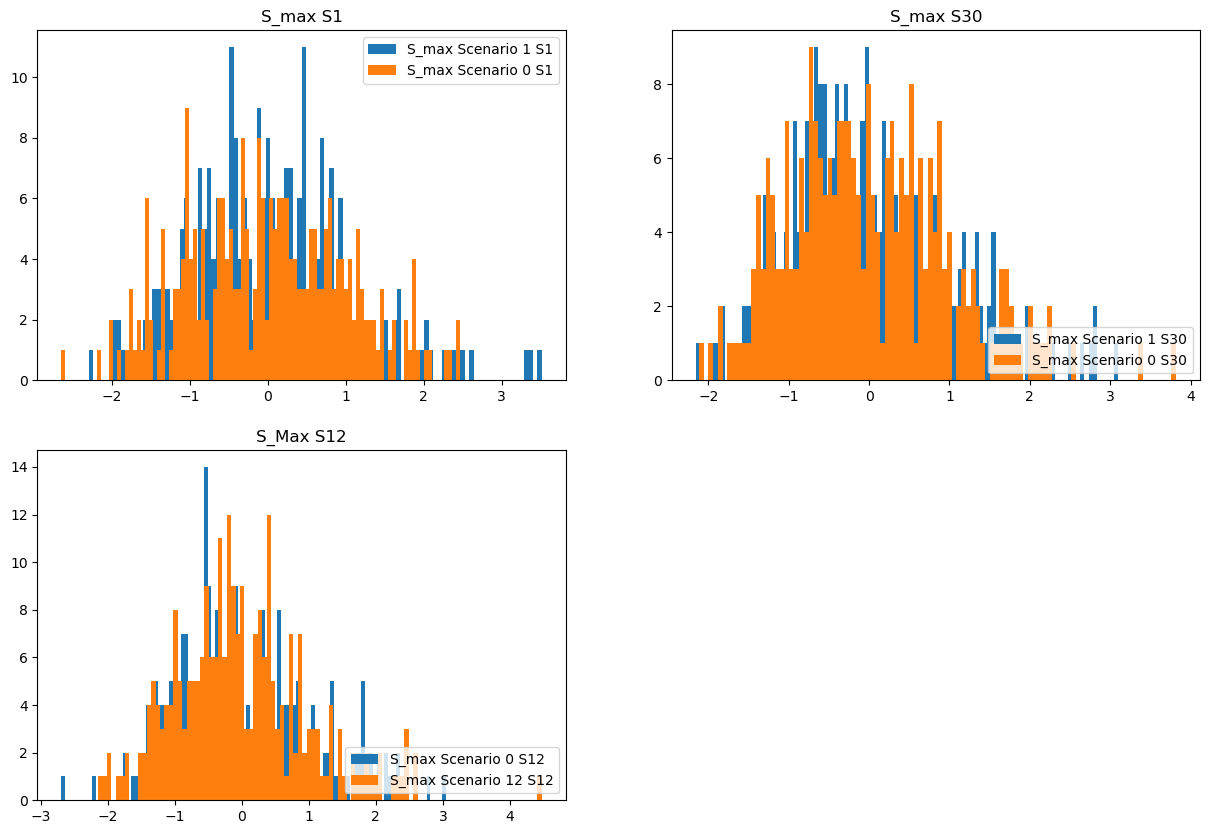

In [61]:
## Plotting caracteristics S_max
propertyLabel = 'S_max';
propertyvalue = 's_max_';

axis = df_1[propertyvalue + 'S1'].astype(float);
axis30 = df_1[propertyvalue + 'S30'].astype(float);
axis0 = df_0[propertyvalue + 'S1'].astype(float);
axis030 = df_0[propertyvalue + 'S30'].astype(float);

axis012 = df_0[propertyvalue + 'S12'].astype(float);
axis1212 = df_12[propertyvalue + 'S12'].astype(float);
axis121 = df_12[propertyvalue + 'S1'].astype(float);

plt.figure(figsize=(15, 10))
plt.subplot(2,2,1)

axis

plt.title(propertyLabel + ' S1')
plt.hist(axis, bins=100, label= propertyLabel + " Scenario 1 S1")
plt.hist(axis0, bins=100, label= propertyLabel + " Scenario 0 S1")

# plt.ylim([0,0.35])

plt.legend([ propertyLabel + " Scenario 1 S1", propertyLabel + " Scenario 0 S1"], loc ="upper right")

plt.subplot(2,2,2)

plt.title(propertyLabel + " S30")
plt.hist(axis30, bins=100, label = propertyLabel + " Scenario 1 S30")
plt.hist(axis030, bins=100, label = propertyLabel + " Scenario 0 S30")

# # plt.ylim([0,0.35])

plt.legend([propertyLabel + " Scenario 1 S30", propertyLabel + " Scenario 0 S30"], loc ="lower right")

plt.subplot(2,2,3)

plt.title("S_Max S12")
plt.hist(axis012, bins=100, label = propertyLabel + " Scenario 0 S12")
plt.hist(axis1212, bins=100, label = propertyLabel + " Scenario 12 S12")

# # plt.ylim([0,0.35])

plt.legend([propertyLabel + " Scenario 0 S12", propertyLabel + " Scenario 12 S12"], loc ="lower right")

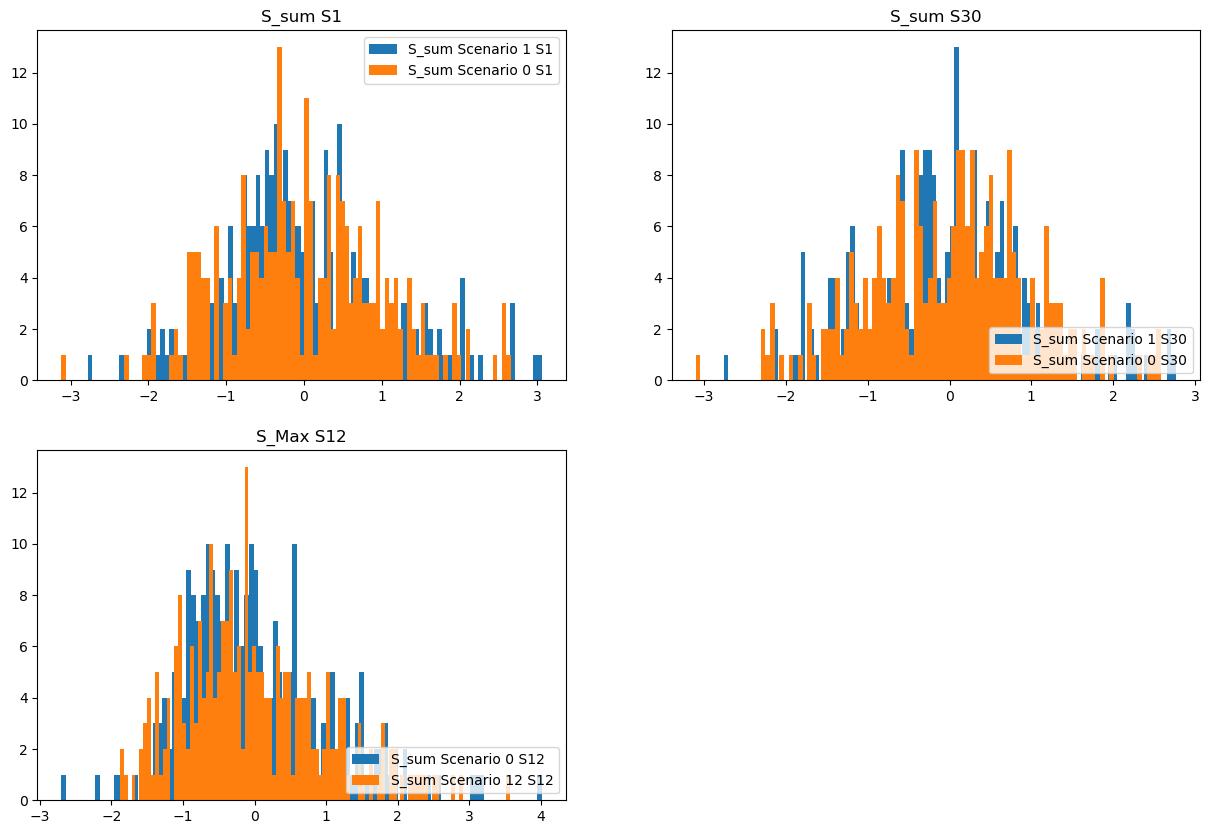

In [62]:
## Plotting caracteristics S_sum
propertyLabel = 'S_sum';
propertyvalue = 's_sum_';

axis = df_1[propertyvalue + 'S1'].astype(float);
axis30 = df_1[propertyvalue + 'S30'].astype(float);
axis0 = df_0[propertyvalue + 'S1'].astype(float);
axis030 = df_0[propertyvalue + 'S30'].astype(float);

axis012 = df_0[propertyvalue + 'S12'].astype(float);
axis1212 = df_12[propertyvalue + 'S12'].astype(float);
axis121 = df_12[propertyvalue + 'S1'].astype(float);

plt.figure(figsize=(15, 10))
plt.subplot(2,2,1)

axis

plt.title(propertyLabel + ' S1')
plt.hist(axis, bins=100, label= propertyLabel + " Scenario 1 S1")
plt.hist(axis0, bins=100, label= propertyLabel + " Scenario 0 S1")

# plt.ylim([0,0.35])

plt.legend([ propertyLabel + " Scenario 1 S1", propertyLabel + " Scenario 0 S1"], loc ="upper right")

plt.subplot(2,2,2)

plt.title(propertyLabel + " S30")
plt.hist(axis30, bins=100, label = propertyLabel + " Scenario 1 S30")
plt.hist(axis030, bins=100, label = propertyLabel + " Scenario 0 S30")

# # plt.ylim([0,0.35])

plt.legend([propertyLabel + " Scenario 1 S30", propertyLabel + " Scenario 0 S30"], loc ="lower right")

plt.subplot(2,2,3)

plt.title("S_Max S12")
plt.hist(axis012, bins=100, label = propertyLabel + " Scenario 0 S12")
plt.hist(axis1212, bins=100, label = propertyLabel + " Scenario 12 S12")

# # plt.ylim([0,0.35])

plt.legend([propertyLabel + " Scenario 0 S12", propertyLabel + " Scenario 12 S12"], loc ="lower right")

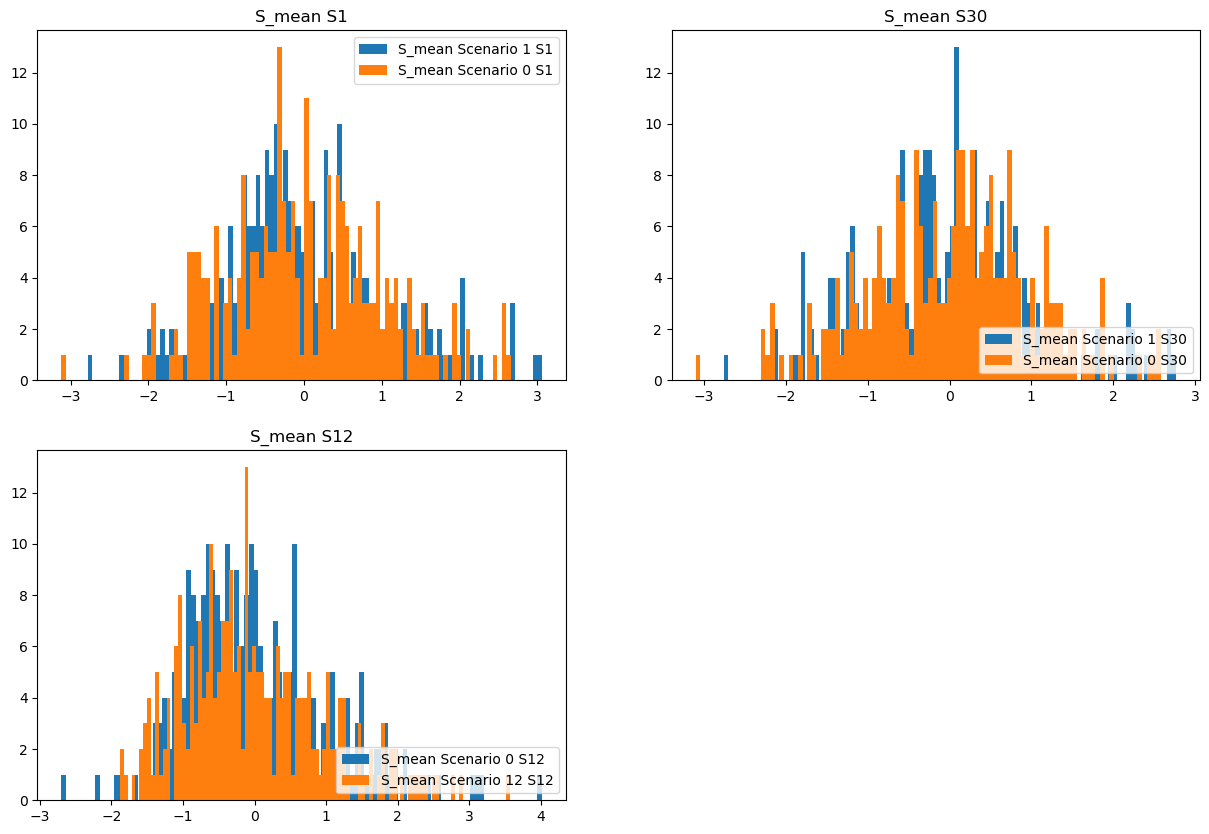

In [63]:
## Plotting caracteristics S_mean
propertyLabel = 'S_mean';
propertyvalue = 's_mean_';

axis = df_1[propertyvalue + 'S1'].astype(float);
axis30 = df_1[propertyvalue + 'S30'].astype(float);
axis0 = df_0[propertyvalue + 'S1'].astype(float);
axis030 = df_0[propertyvalue + 'S30'].astype(float);

axis012 = df_0[propertyvalue + 'S12'].astype(float);
axis1212 = df_12[propertyvalue + 'S12'].astype(float);
axis121 = df_12[propertyvalue + 'S1'].astype(float);

plt.figure(figsize=(15, 10))
plt.subplot(2,2,1)

axis

plt.title(propertyLabel + ' S1')
plt.hist(axis, bins=100, label= propertyLabel + " Scenario 1 S1")
plt.hist(axis0, bins=100, label= propertyLabel + " Scenario 0 S1")

# plt.ylim([0,0.35])

plt.legend([ propertyLabel + " Scenario 1 S1", propertyLabel + " Scenario 0 S1"], loc ="upper right")

plt.subplot(2,2,2)

plt.title(propertyLabel + " S30")
plt.hist(axis30, bins=100, label = propertyLabel + " Scenario 1 S30")
plt.hist(axis030, bins=100, label = propertyLabel + " Scenario 0 S30")

# # plt.ylim([0,0.35])

plt.legend([propertyLabel + " Scenario 1 S30", propertyLabel + " Scenario 0 S30"], loc ="lower right")

plt.subplot(2,2,3)

plt.title(propertyLabel + " S12")
plt.hist(axis012, bins=100, label = propertyLabel + " Scenario 0 S12")
plt.hist(axis1212, bins=100, label = propertyLabel + " Scenario 12 S12")

# # plt.ylim([0,0.35])

plt.legend([propertyLabel + " Scenario 0 S12", propertyLabel + " Scenario 12 S12"], loc ="lower right")

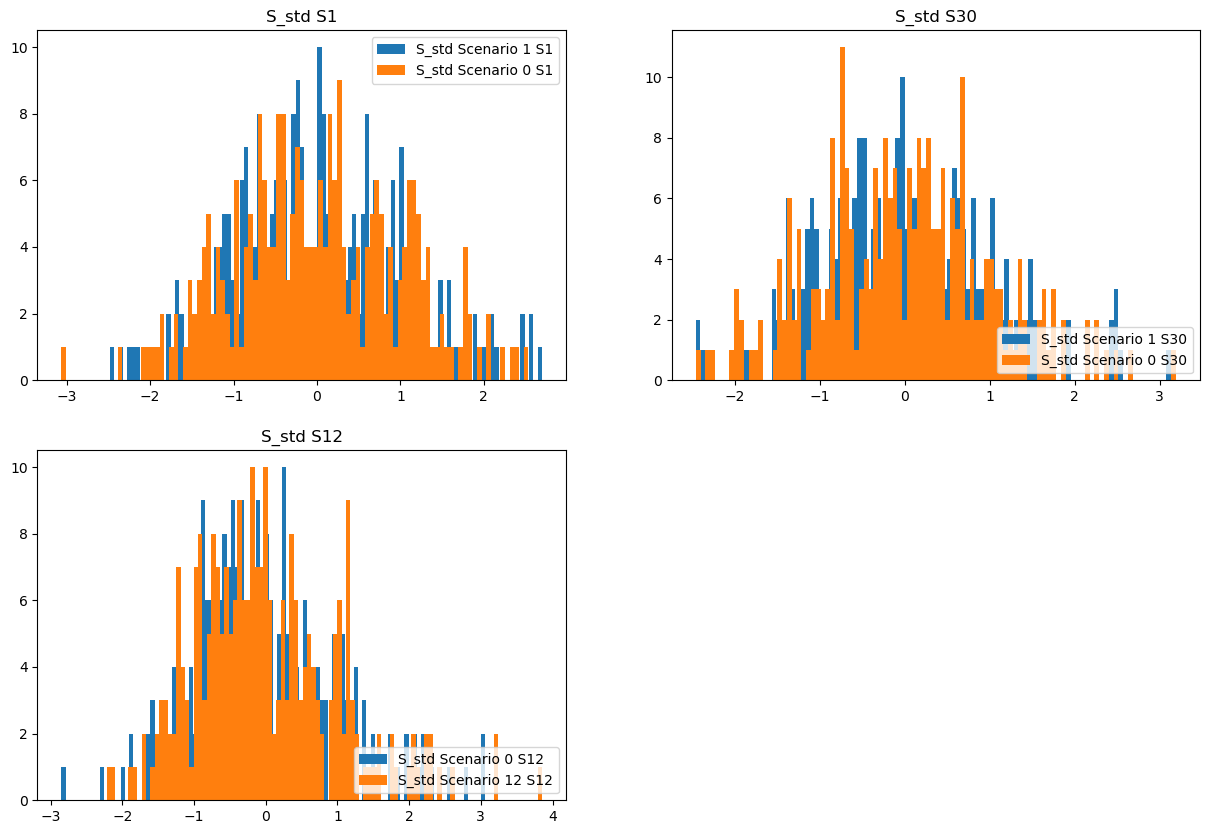

In [64]:
## Plotting caracteristics S_std
propertyLabel = 'S_std';
propertyvalue = 's_std_';

axis = df_1[propertyvalue + 'S1'].astype(float);
axis30 = df_1[propertyvalue + 'S30'].astype(float);
axis0 = df_0[propertyvalue + 'S1'].astype(float);
axis030 = df_0[propertyvalue + 'S30'].astype(float);

axis012 = df_0[propertyvalue + 'S12'].astype(float);
axis1212 = df_12[propertyvalue + 'S12'].astype(float);
axis121 = df_12[propertyvalue + 'S1'].astype(float);

plt.figure(figsize=(15, 10))
plt.subplot(2,2,1)

axis

plt.title(propertyLabel + ' S1')
plt.hist(axis, bins=100, label= propertyLabel + " Scenario 1 S1")
plt.hist(axis0, bins=100, label= propertyLabel + " Scenario 0 S1")

# plt.ylim([0,0.35])

plt.legend([ propertyLabel + " Scenario 1 S1", propertyLabel + " Scenario 0 S1"], loc ="upper right")

plt.subplot(2,2,2)

plt.title(propertyLabel + " S30")
plt.hist(axis30, bins=100, label = propertyLabel + " Scenario 1 S30")
plt.hist(axis030, bins=100, label = propertyLabel + " Scenario 0 S30")

# # plt.ylim([0,0.35])

plt.legend([propertyLabel + " Scenario 1 S30", propertyLabel + " Scenario 0 S30"], loc ="lower right")

plt.subplot(2,2,3)

plt.title(propertyLabel + " S12")
plt.hist(axis012, bins=100, label = propertyLabel + " Scenario 0 S12")
plt.hist(axis1212, bins=100, label = propertyLabel + " Scenario 12 S12")

# # plt.ylim([0,0.35])

plt.legend([propertyLabel + " Scenario 0 S12", propertyLabel + " Scenario 12 S12"], loc ="lower right")

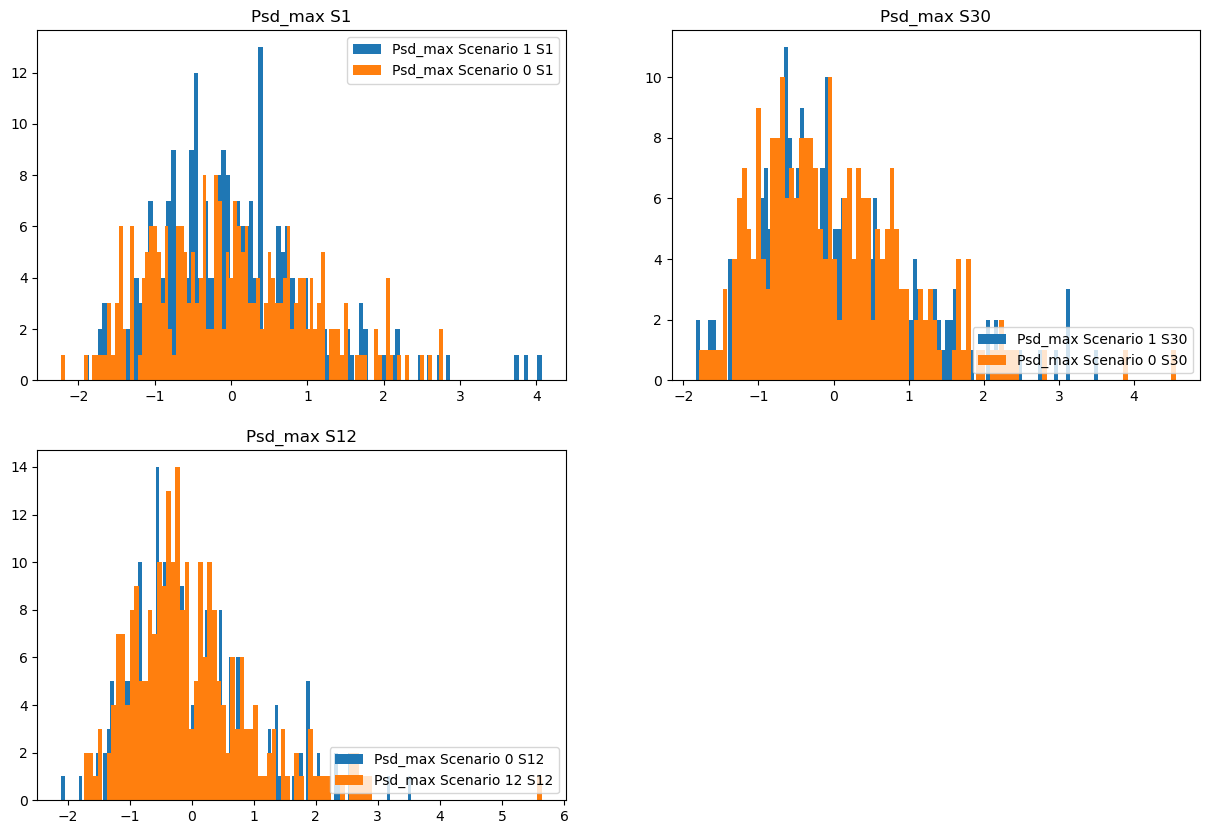

In [65]:
## Plotting caracteristics Psd_max
propertyLabel = 'Psd_max';
propertyvalue = 'psd_max_';

axis = df_1[propertyvalue + 'S1'].astype(float);
axis30 = df_1[propertyvalue + 'S30'].astype(float);
axis0 = df_0[propertyvalue + 'S1'].astype(float);
axis030 = df_0[propertyvalue + 'S30'].astype(float);

axis012 = df_0[propertyvalue + 'S12'].astype(float);
axis1212 = df_12[propertyvalue + 'S12'].astype(float);
axis121 = df_12[propertyvalue + 'S1'].astype(float);

plt.figure(figsize=(15, 10))
plt.subplot(2,2,1)

axis

plt.title(propertyLabel + ' S1')
plt.hist(axis, bins=100, label= propertyLabel + " Scenario 1 S1")
plt.hist(axis0, bins=100, label= propertyLabel + " Scenario 0 S1")

# plt.ylim([0,0.35])

plt.legend([ propertyLabel + " Scenario 1 S1", propertyLabel + " Scenario 0 S1"], loc ="upper right")

plt.subplot(2,2,2)

plt.title(propertyLabel + " S30")
plt.hist(axis30, bins=100, label = propertyLabel + " Scenario 1 S30")
plt.hist(axis030, bins=100, label = propertyLabel + " Scenario 0 S30")

# # plt.ylim([0,0.35])

plt.legend([propertyLabel + " Scenario 1 S30", propertyLabel + " Scenario 0 S30"], loc ="lower right")

plt.subplot(2,2,3)

plt.title(propertyLabel + " S12")
plt.hist(axis012, bins=100, label = propertyLabel + " Scenario 0 S12")
plt.hist(axis1212, bins=100, label = propertyLabel + " Scenario 12 S12")

# # plt.ylim([0,0.35])

plt.legend([propertyLabel + " Scenario 0 S12", propertyLabel + " Scenario 12 S12"], loc ="lower right")

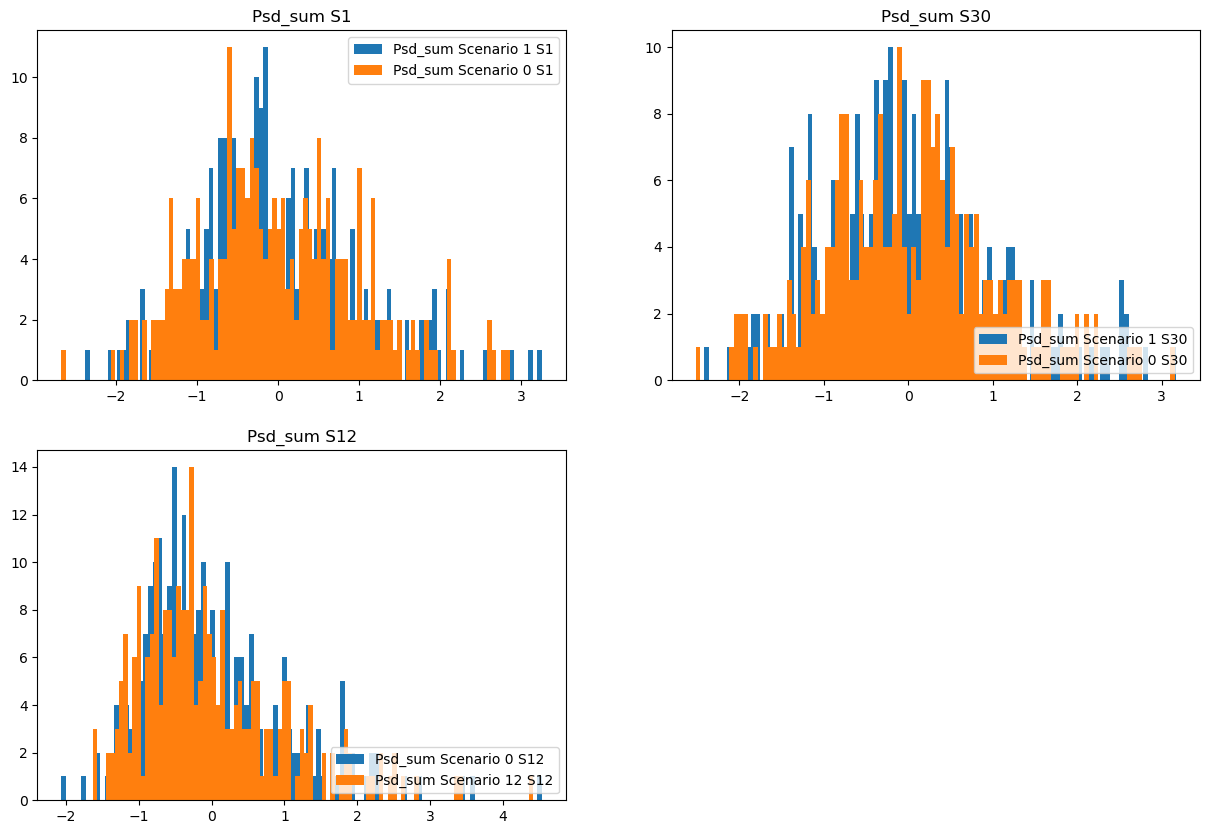

In [67]:
## Plotting caracteristics Psd_sum
propertyLabel = 'Psd_sum';
propertyvalue = 'psd_sum_';

axis = df_1[propertyvalue + 'S1'].astype(float);
axis30 = df_1[propertyvalue + 'S30'].astype(float);
axis0 = df_0[propertyvalue + 'S1'].astype(float);
axis030 = df_0[propertyvalue + 'S30'].astype(float);

axis012 = df_0[propertyvalue + 'S12'].astype(float);
axis1212 = df_12[propertyvalue + 'S12'].astype(float);
axis121 = df_12[propertyvalue + 'S1'].astype(float);

plt.figure(figsize=(15, 10))
plt.subplot(2,2,1)

axis

plt.title(propertyLabel + ' S1')
plt.hist(axis, bins=100, label= propertyLabel + " Scenario 1 S1")
plt.hist(axis0, bins=100, label= propertyLabel + " Scenario 0 S1")

# plt.ylim([0,0.35])

plt.legend([ propertyLabel + " Scenario 1 S1", propertyLabel + " Scenario 0 S1"], loc ="upper right")

plt.subplot(2,2,2)

plt.title(propertyLabel + " S30")
plt.hist(axis30, bins=100, label = propertyLabel + " Scenario 1 S30")
plt.hist(axis030, bins=100, label = propertyLabel + " Scenario 0 S30")

# # plt.ylim([0,0.35])

plt.legend([propertyLabel + " Scenario 1 S30", propertyLabel + " Scenario 0 S30"], loc ="lower right")

plt.subplot(2,2,3)

plt.title(propertyLabel + " S12")
plt.hist(axis012, bins=100, label = propertyLabel + " Scenario 0 S12")
plt.hist(axis1212, bins=100, label = propertyLabel + " Scenario 12 S12")

# # plt.ylim([0,0.35])

plt.legend([propertyLabel + " Scenario 0 S12", propertyLabel + " Scenario 12 S12"], loc ="lower right")

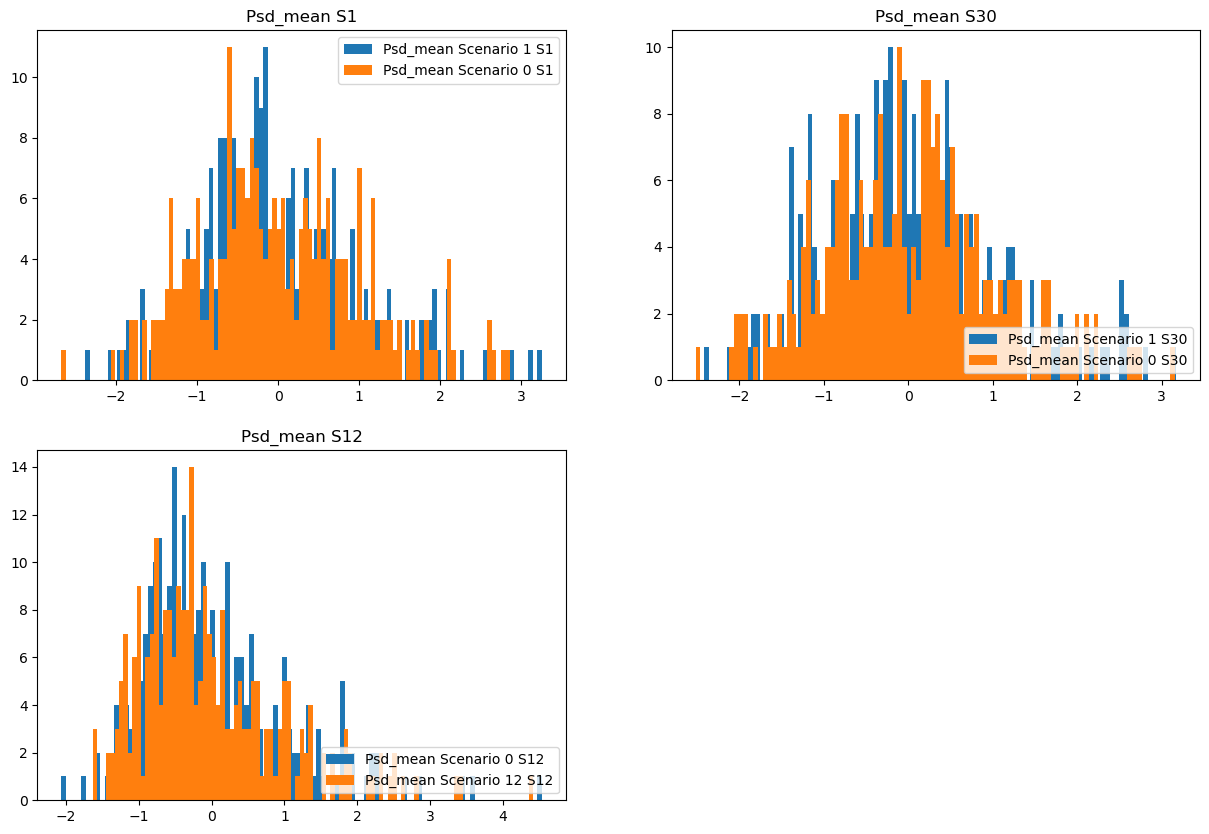

In [68]:
## Plotting caracteristics Psd_mean
propertyLabel = 'Psd_mean';
propertyvalue = 'psd_mean_';

axis = df_1[propertyvalue + 'S1'].astype(float);
axis30 = df_1[propertyvalue + 'S30'].astype(float);
axis0 = df_0[propertyvalue + 'S1'].astype(float);
axis030 = df_0[propertyvalue + 'S30'].astype(float);

axis012 = df_0[propertyvalue + 'S12'].astype(float);
axis1212 = df_12[propertyvalue + 'S12'].astype(float);
axis121 = df_12[propertyvalue + 'S1'].astype(float);

plt.figure(figsize=(15, 10))
plt.subplot(2,2,1)

axis

plt.title(propertyLabel + ' S1')
plt.hist(axis, bins=100, label= propertyLabel + " Scenario 1 S1")
plt.hist(axis0, bins=100, label= propertyLabel + " Scenario 0 S1")

# plt.ylim([0,0.35])

plt.legend([ propertyLabel + " Scenario 1 S1", propertyLabel + " Scenario 0 S1"], loc ="upper right")

plt.subplot(2,2,2)

plt.title(propertyLabel + " S30")
plt.hist(axis30, bins=100, label = propertyLabel + " Scenario 1 S30")
plt.hist(axis030, bins=100, label = propertyLabel + " Scenario 0 S30")

# # plt.ylim([0,0.35])

plt.legend([propertyLabel + " Scenario 1 S30", propertyLabel + " Scenario 0 S30"], loc ="lower right")

plt.subplot(2,2,3)

plt.title(propertyLabel + " S12")
plt.hist(axis012, bins=100, label = propertyLabel + " Scenario 0 S12")
plt.hist(axis1212, bins=100, label = propertyLabel + " Scenario 12 S12")

# # plt.ylim([0,0.35])

plt.legend([propertyLabel + " Scenario 0 S12", propertyLabel + " Scenario 12 S12"], loc ="lower right")

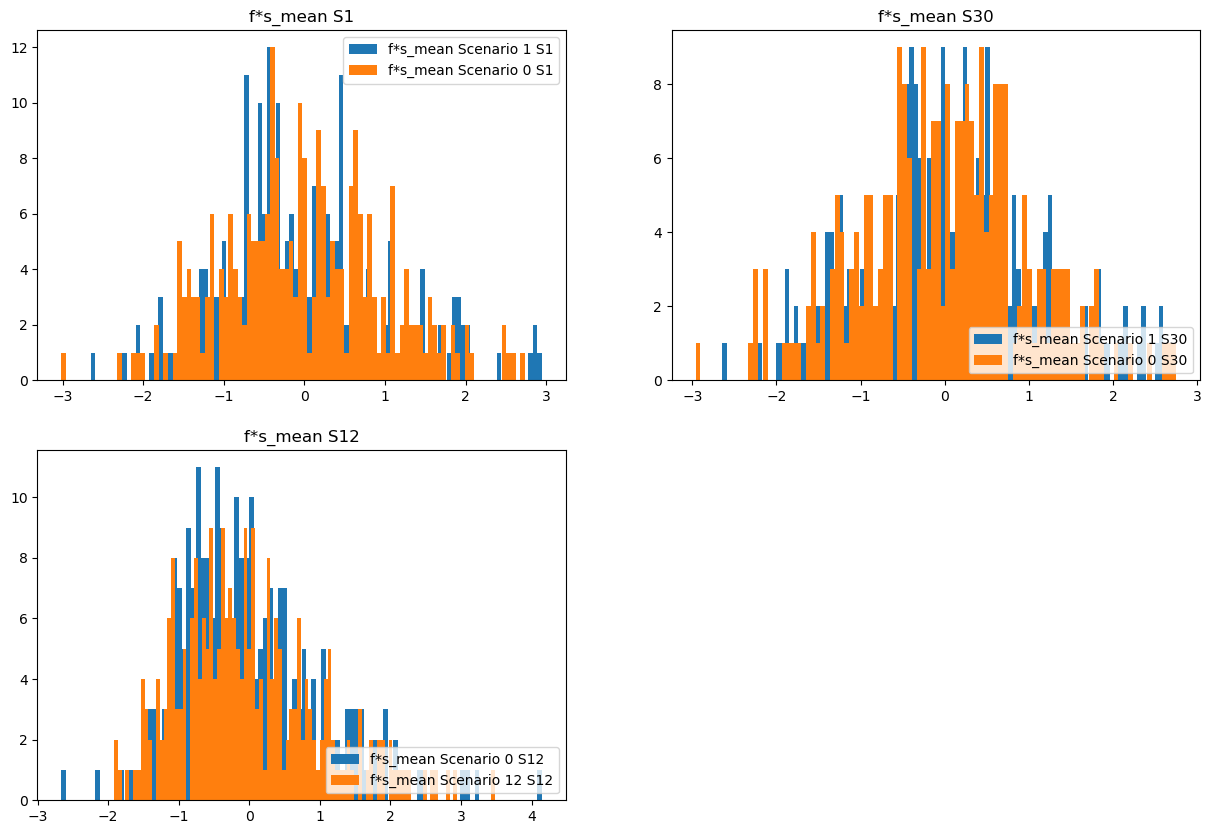

In [71]:
## Plotting caracteristics f*s_mean
propertyLabel = 'f*s_mean';
propertyvalue = 'f*s_mean_';

axis = df_1[propertyvalue + 'S1'].astype(float);
axis30 = df_1[propertyvalue + 'S30'].astype(float);
axis0 = df_0[propertyvalue + 'S1'].astype(float);
axis030 = df_0[propertyvalue + 'S30'].astype(float);

axis012 = df_0[propertyvalue + 'S12'].astype(float);
axis1212 = df_12[propertyvalue + 'S12'].astype(float);
axis121 = df_12[propertyvalue + 'S1'].astype(float);

plt.figure(figsize=(15, 10))
plt.subplot(2,2,1)

axis

plt.title(propertyLabel + ' S1')
plt.hist(axis, bins=100, label= propertyLabel + " Scenario 1 S1")
plt.hist(axis0, bins=100, label= propertyLabel + " Scenario 0 S1")

# plt.ylim([0,0.35])

plt.legend([ propertyLabel + " Scenario 1 S1", propertyLabel + " Scenario 0 S1"], loc ="upper right")

plt.subplot(2,2,2)

plt.title(propertyLabel + " S30")
plt.hist(axis30, bins=100, label = propertyLabel + " Scenario 1 S30")
plt.hist(axis030, bins=100, label = propertyLabel + " Scenario 0 S30")

# # plt.ylim([0,0.35])

plt.legend([propertyLabel + " Scenario 1 S30", propertyLabel + " Scenario 0 S30"], loc ="lower right")

plt.subplot(2,2,3)

plt.title(propertyLabel + " S12")
plt.hist(axis012, bins=100, label = propertyLabel + " Scenario 0 S12")
plt.hist(axis1212, bins=100, label = propertyLabel + " Scenario 12 S12")

# # plt.ylim([0,0.35])

plt.legend([propertyLabel + " Scenario 0 S12", propertyLabel + " Scenario 12 S12"], loc ="lower right")

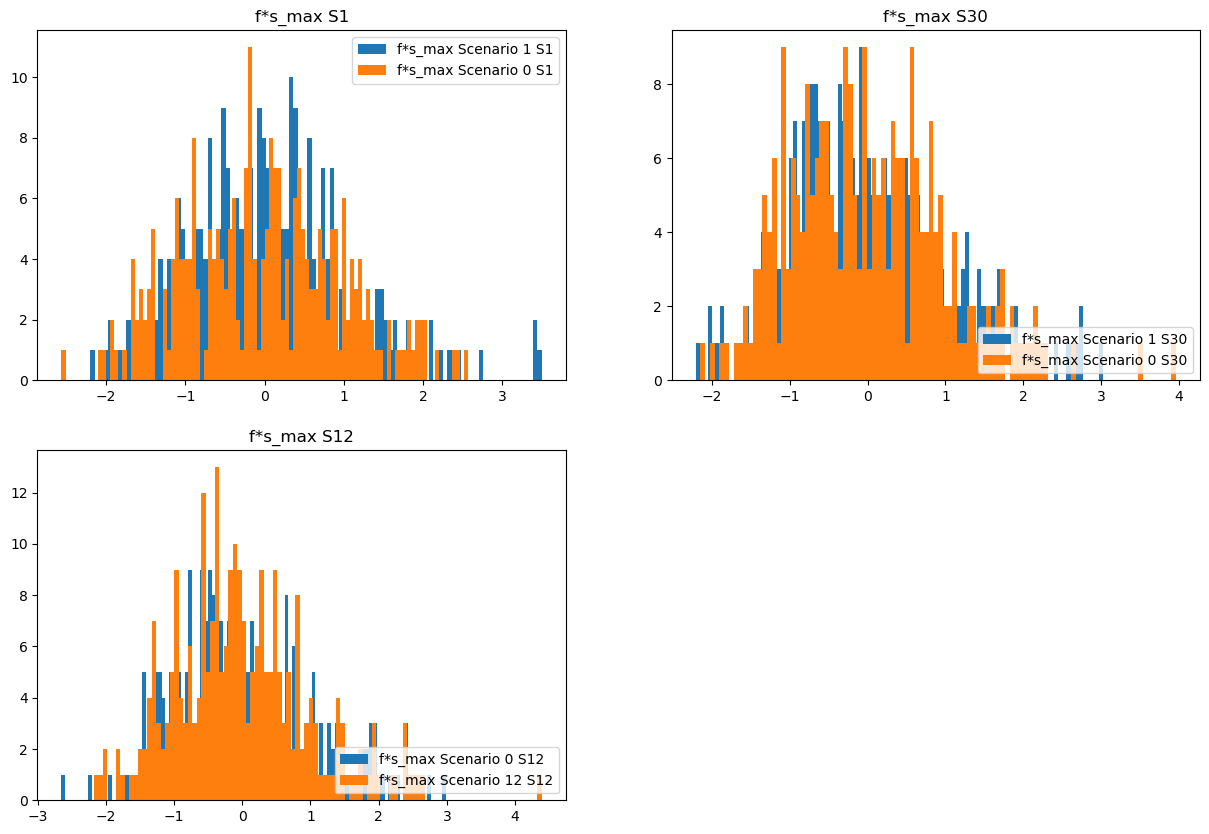

In [72]:
## Plotting caracteristics f*s_max
propertyLabel = 'f*s_max';
propertyvalue = 'f*s_max_';

axis = df_1[propertyvalue + 'S1'].astype(float);
axis30 = df_1[propertyvalue + 'S30'].astype(float);
axis0 = df_0[propertyvalue + 'S1'].astype(float);
axis030 = df_0[propertyvalue + 'S30'].astype(float);

axis012 = df_0[propertyvalue + 'S12'].astype(float);
axis1212 = df_12[propertyvalue + 'S12'].astype(float);
axis121 = df_12[propertyvalue + 'S1'].astype(float);

plt.figure(figsize=(15, 10))
plt.subplot(2,2,1)

axis

plt.title(propertyLabel + ' S1')
plt.hist(axis, bins=100, label= propertyLabel + " Scenario 1 S1")
plt.hist(axis0, bins=100, label= propertyLabel + " Scenario 0 S1")

# plt.ylim([0,0.35])

plt.legend([ propertyLabel + " Scenario 1 S1", propertyLabel + " Scenario 0 S1"], loc ="upper right")

plt.subplot(2,2,2)

plt.title(propertyLabel + " S30")
plt.hist(axis30, bins=100, label = propertyLabel + " Scenario 1 S30")
plt.hist(axis030, bins=100, label = propertyLabel + " Scenario 0 S30")

# # plt.ylim([0,0.35])

plt.legend([propertyLabel + " Scenario 1 S30", propertyLabel + " Scenario 0 S30"], loc ="lower right")

plt.subplot(2,2,3)

plt.title(propertyLabel + " S12")
plt.hist(axis012, bins=100, label = propertyLabel + " Scenario 0 S12")
plt.hist(axis1212, bins=100, label = propertyLabel + " Scenario 12 S12")

# # plt.ylim([0,0.35])

plt.legend([propertyLabel + " Scenario 0 S12", propertyLabel + " Scenario 12 S12"], loc ="lower right")

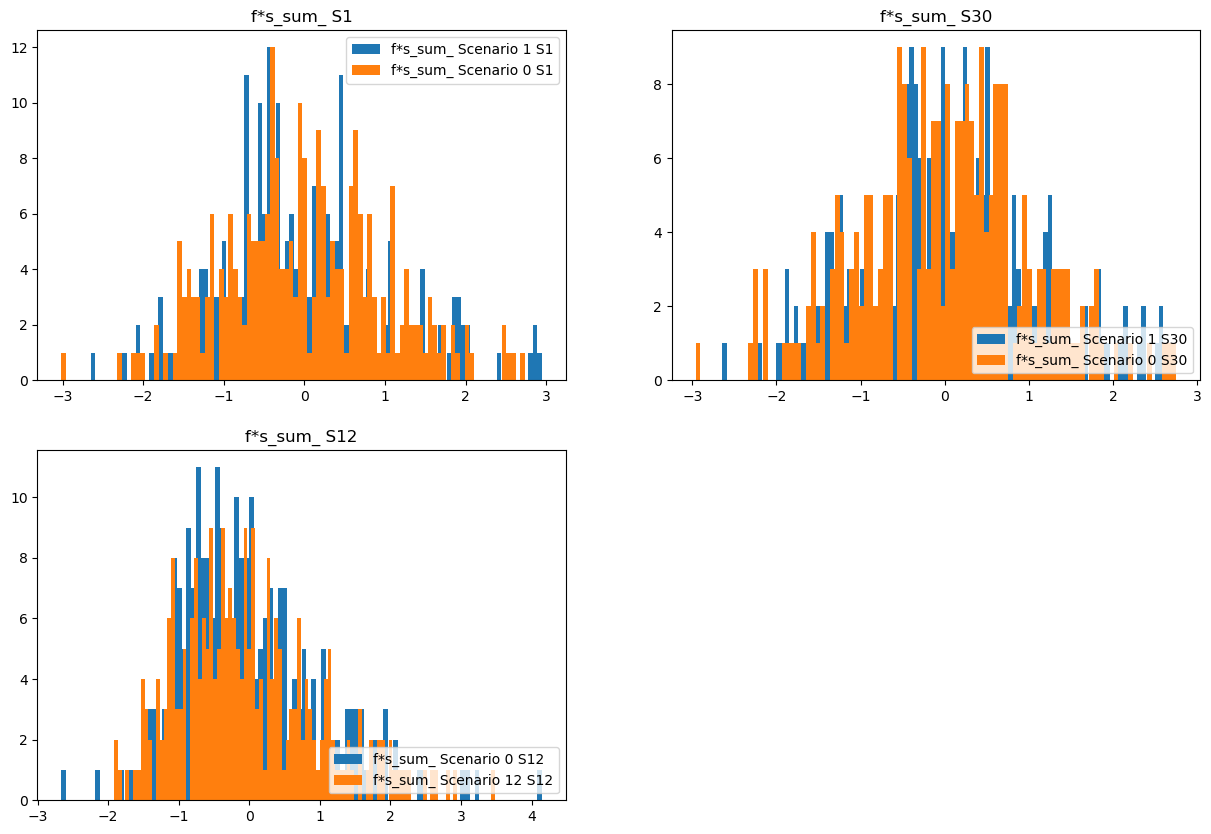

In [74]:
## Plotting caracteristics f*s_sum
propertyLabel = 'f*s_sum_';
propertyvalue = 'f*s_sum_';

axis = df_1[propertyvalue + 'S1'].astype(float);
axis30 = df_1[propertyvalue + 'S30'].astype(float);
axis0 = df_0[propertyvalue + 'S1'].astype(float);
axis030 = df_0[propertyvalue + 'S30'].astype(float);

axis012 = df_0[propertyvalue + 'S12'].astype(float);
axis1212 = df_12[propertyvalue + 'S12'].astype(float);
axis121 = df_12[propertyvalue + 'S1'].astype(float);

plt.figure(figsize=(15, 10))
plt.subplot(2,2,1)

axis

plt.title(propertyLabel + ' S1')
plt.hist(axis, bins=100, label= propertyLabel + " Scenario 1 S1")
plt.hist(axis0, bins=100, label= propertyLabel + " Scenario 0 S1")

# plt.ylim([0,0.35])

plt.legend([ propertyLabel + " Scenario 1 S1", propertyLabel + " Scenario 0 S1"], loc ="upper right")

plt.subplot(2,2,2)

plt.title(propertyLabel + " S30")
plt.hist(axis30, bins=100, label = propertyLabel + " Scenario 1 S30")
plt.hist(axis030, bins=100, label = propertyLabel + " Scenario 0 S30")

# # plt.ylim([0,0.35])

plt.legend([propertyLabel + " Scenario 1 S30", propertyLabel + " Scenario 0 S30"], loc ="lower right")

plt.subplot(2,2,3)

plt.title(propertyLabel + " S12")
plt.hist(axis012, bins=100, label = propertyLabel + " Scenario 0 S12")
plt.hist(axis1212, bins=100, label = propertyLabel + " Scenario 12 S12")

# # plt.ylim([0,0.35])

plt.legend([propertyLabel + " Scenario 0 S12", propertyLabel + " Scenario 12 S12"], loc ="lower right")

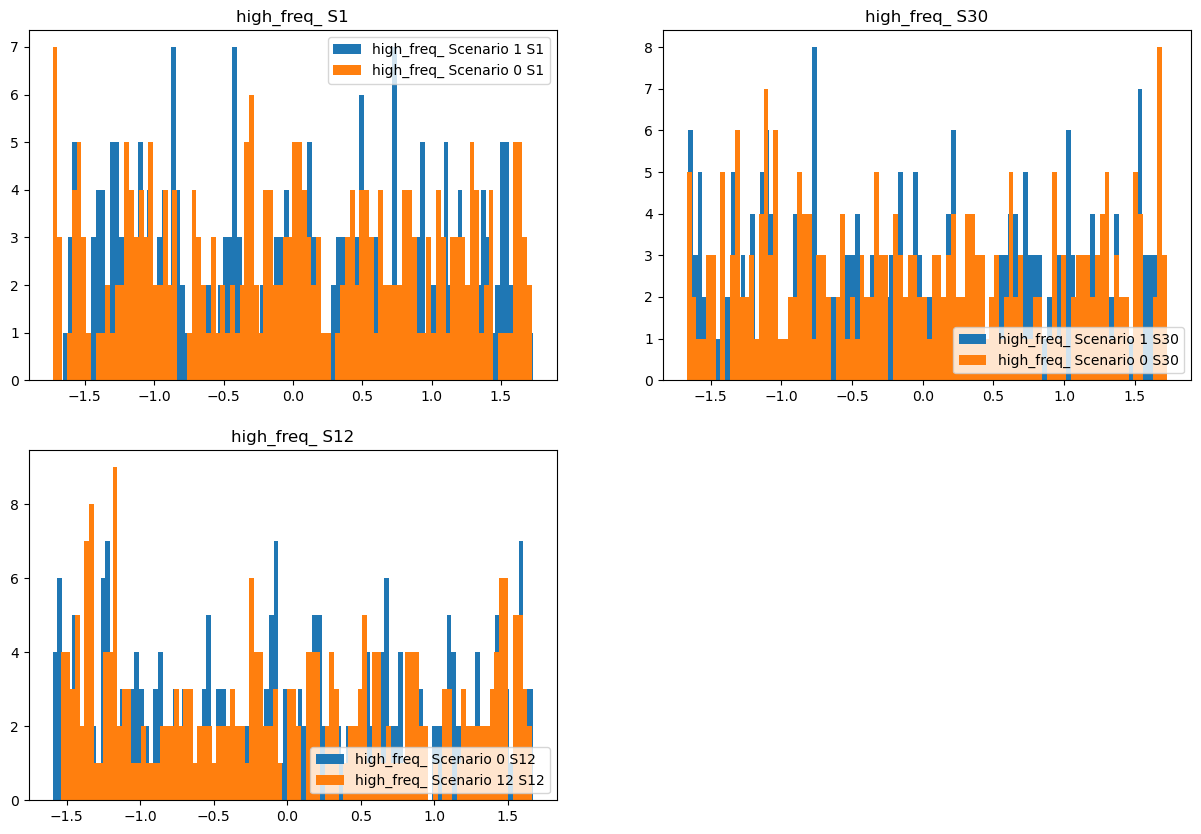

In [75]:
## Plotting caracteristics high_freq
propertyLabel = 'high_freq_';
propertyvalue = 'high_freq_';

axis = df_1[propertyvalue + 'S1'].astype(float);
axis30 = df_1[propertyvalue + 'S30'].astype(float);
axis0 = df_0[propertyvalue + 'S1'].astype(float);
axis030 = df_0[propertyvalue + 'S30'].astype(float);

axis012 = df_0[propertyvalue + 'S12'].astype(float);
axis1212 = df_12[propertyvalue + 'S12'].astype(float);
axis121 = df_12[propertyvalue + 'S1'].astype(float);

plt.figure(figsize=(15, 10))
plt.subplot(2,2,1)

axis

plt.title(propertyLabel + ' S1')
plt.hist(axis, bins=100, label= propertyLabel + " Scenario 1 S1")
plt.hist(axis0, bins=100, label= propertyLabel + " Scenario 0 S1")

# plt.ylim([0,0.35])

plt.legend([ propertyLabel + " Scenario 1 S1", propertyLabel + " Scenario 0 S1"], loc ="upper right")

plt.subplot(2,2,2)

plt.title(propertyLabel + " S30")
plt.hist(axis30, bins=100, label = propertyLabel + " Scenario 1 S30")
plt.hist(axis030, bins=100, label = propertyLabel + " Scenario 0 S30")

# # plt.ylim([0,0.35])

plt.legend([propertyLabel + " Scenario 1 S30", propertyLabel + " Scenario 0 S30"], loc ="lower right")

plt.subplot(2,2,3)

plt.title(propertyLabel + " S12")
plt.hist(axis012, bins=100, label = propertyLabel + " Scenario 0 S12")
plt.hist(axis1212, bins=100, label = propertyLabel + " Scenario 12 S12")

# # plt.ylim([0,0.35])

plt.legend([propertyLabel + " Scenario 0 S12", propertyLabel + " Scenario 12 S12"], loc ="lower right")

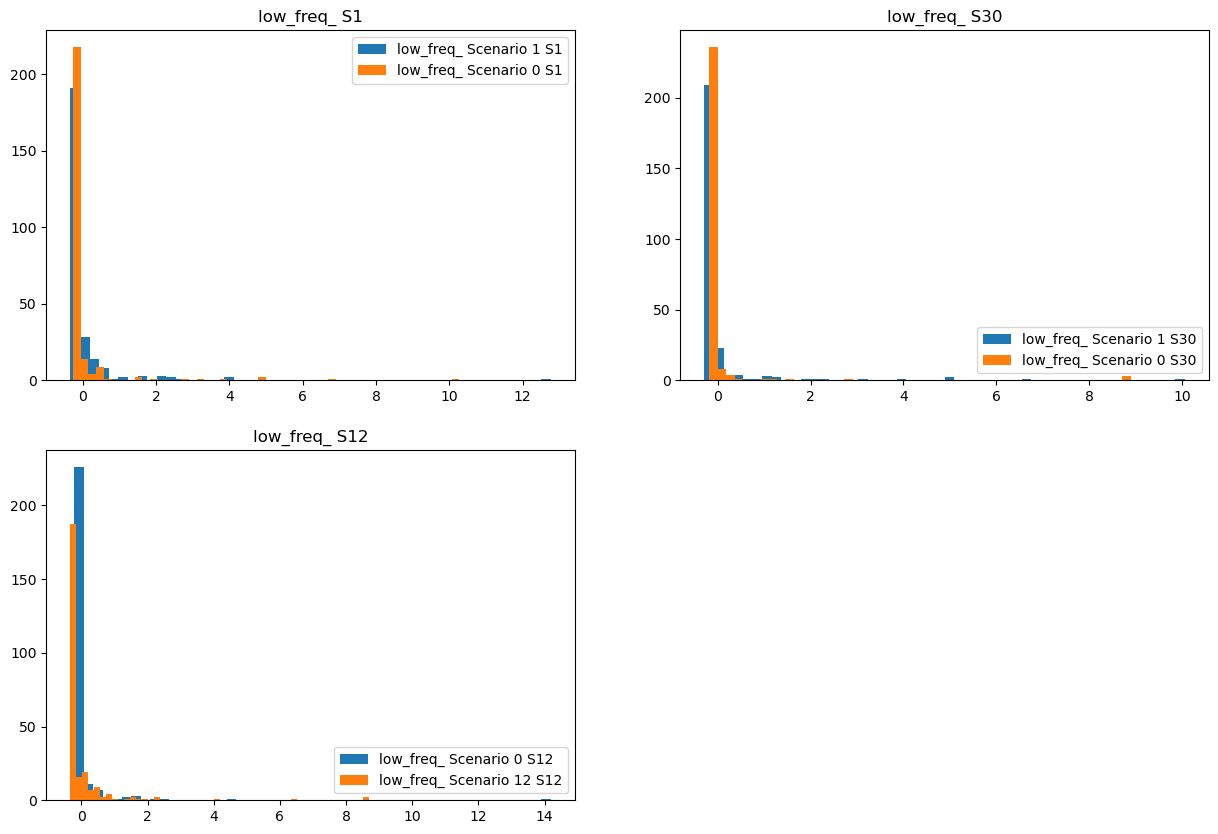

In [77]:
## Plotting caracteristics low_freq
propertyLabel = 'low_freq_';
propertyvalue = 'low_freq_';

axis = df_1[propertyvalue + 'S1'].astype(float);
axis30 = df_1[propertyvalue + 'S30'].astype(float);
axis0 = df_0[propertyvalue + 'S1'].astype(float);
axis030 = df_0[propertyvalue + 'S30'].astype(float);

axis012 = df_0[propertyvalue + 'S12'].astype(float);
axis1212 = df_12[propertyvalue + 'S12'].astype(float);
axis121 = df_12[propertyvalue + 'S1'].astype(float);

plt.figure(figsize=(15, 10))
plt.subplot(2,2,1)

axis

plt.title(propertyLabel + ' S1')
plt.hist(axis, bins=50, label= propertyLabel + " Scenario 1 S1")
plt.hist(axis0, bins=50, label= propertyLabel + " Scenario 0 S1")

# plt.ylim([0,0.35])

plt.legend([ propertyLabel + " Scenario 1 S1", propertyLabel + " Scenario 0 S1"], loc ="upper right")

plt.subplot(2,2,2)

plt.title(propertyLabel + " S30")
plt.hist(axis30, bins=50, label = propertyLabel + " Scenario 1 S30")
plt.hist(axis030, bins=50, label = propertyLabel + " Scenario 0 S30")

# # plt.ylim([0,0.35])

plt.legend([propertyLabel + " Scenario 1 S30", propertyLabel + " Scenario 0 S30"], loc ="lower right")

plt.subplot(2,2,3)

plt.title(propertyLabel + " S12")
plt.hist(axis012, bins=50, label = propertyLabel + " Scenario 0 S12")
plt.hist(axis1212, bins=50, label = propertyLabel + " Scenario 12 S12")

# # plt.ylim([0,0.35])

plt.legend([propertyLabel + " Scenario 0 S12", propertyLabel + " Scenario 12 S12"], loc ="lower right")

In [16]:
## A kurtosi mede o grau de o grau de picos e achatamentos em relação a distribuição deles, 
## menor kurtosi maior o achatamento e há maior distribuição dos dados, reduz a concentração dos dados. Pode indicar vibração em amplitudes menores (frequencias naturais)
## O dano aparenta estar se fazendo presente nos dados em ambos os sensores porém para o sensor mais distante da localização do dano esta ocorrendo uma concentração desses dados, uma kurtosi maior 

In [91]:
df_1_S1 = defs_.createDatabaseSingleSensor(df_simples.loc[df_simples['Scenario'] == '1'],1);
df_1_S1 = df_1_S1.drop(columns=['damaged']).astype(float);
df_1_S1 

,s_max_S1,s_sum_S1,s_mean_S1,s_std_S1,psd_max_S1,psd_sum_S1,psd_mean_S1,f*s_mean_S1,f*s_max_S1,f*s_sum_S1,high_freq_S1,low_freq_S1,mean_S1,std_S1,median_S1,skew_S1,amp_max_min_S1,kurtosis_S1
0,0.000778,0.106036,0.000208,0.000162,3.027768e-07,0.000018,3.459908e-08,0.053122,0.397648,13871.182681,376.000963,0.002660,-0.001358,0.143538,-0.002283,0.015408,0.993947,0.103656
1,0.000847,0.130239,0.000255,0.000184,3.584794e-07,0.000025,4.949225e-08,0.065218,0.432487,17029.700896,185.916709,0.005379,-0.000405,0.159932,0.001573,-0.031585,0.930550,-0.101231
2,0.001177,0.123272,0.000241,0.000189,6.922319e-07,0.000024,4.696623e-08,0.061729,0.600990,16118.724848,121.945368,0.008200,0.002315,0.177150,0.002927,-0.003201,1.337910,0.478070
3,0.001212,0.175783,0.000344,0.000245,7.347544e-07,0.000046,8.911312e-08,0.088024,0.619174,22984.924083,509.771622,0.001962,0.002870,0.221392,0.007315,0.045592,1.307263,-0.361960
4,0.001390,0.164442,0.000322,0.000240,9.664138e-07,0.000041,8.053365e-08,0.082345,0.710106,21502.070978,184.917157,0.005408,0.001293,0.183528,0.006328,-0.133435,1.341857,0.338595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,0.000997,0.134546,0.000263,0.000190,4.966204e-07,0.000027,5.265665e-08,0.065825,0.497334,17188.244343,217.773438,0.004592,0.004145,0.171602,0.008804,0.000720,0.997111,-0.144618
252,0.001011,0.128583,0.000252,0.000197,5.107675e-07,0.000026,5.099141e-08,0.062908,0.504368,16426.482764,322.265625,0.003103,0.005604,0.158816,0.011559,-0.059467,0.989275,-0.033417
253,0.000825,0.116141,0.000227,0.000164,3.399607e-07,0.000020,3.924421e-08,0.056821,0.411481,14837.033193,65.429688,0.015284,0.003746,0.151790,0.006686,-0.025000,0.855456,-0.281179
254,0.001178,0.148746,0.000291,0.000218,6.936573e-07,0.000034,6.602281e-08,0.072772,0.587771,19002.241877,192.382812,0.005198,0.001972,0.178260,-0.002544,0.095663,1.143121,0.018956


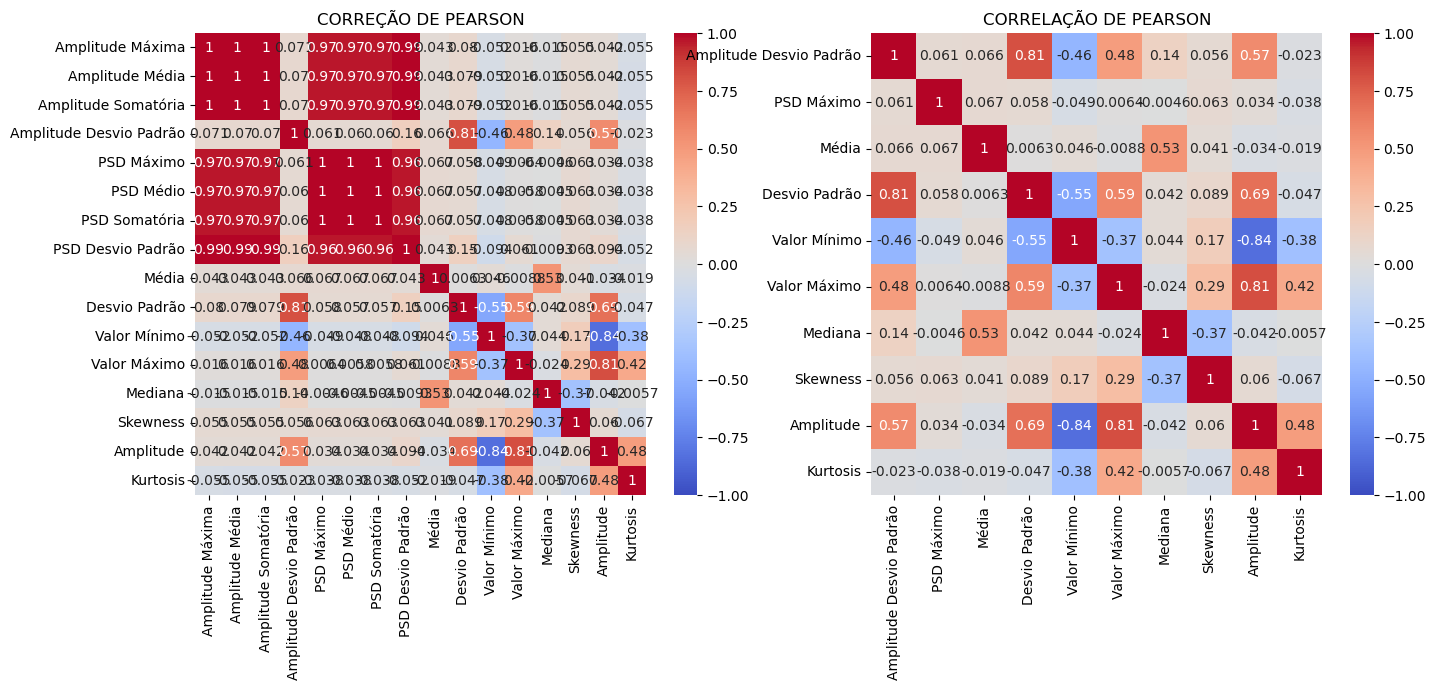

In [6]:
df_1_S1
# ENCONTRANDO COVARIÂNCIAS LINEARES
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.title("CORREÇÃO DE PEARSON")
sns.heatmap(df_1_S1.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1);

plt.subplot(1,2,2)
plt.title("CORRELAÇÃO DE PEARSON")
sns.heatmap(df_1_S1.drop(columns=['Amplitude Máxima','Amplitude Média','Amplitude Somatória','PSD Médio','PSD Somatória','PSD Desvio Padrão']).corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1);


KeyError: "['Amplitude Média', 'Amplitude Somatória', 'PSD Médio', 'PSD Somatória'] not found in axis"

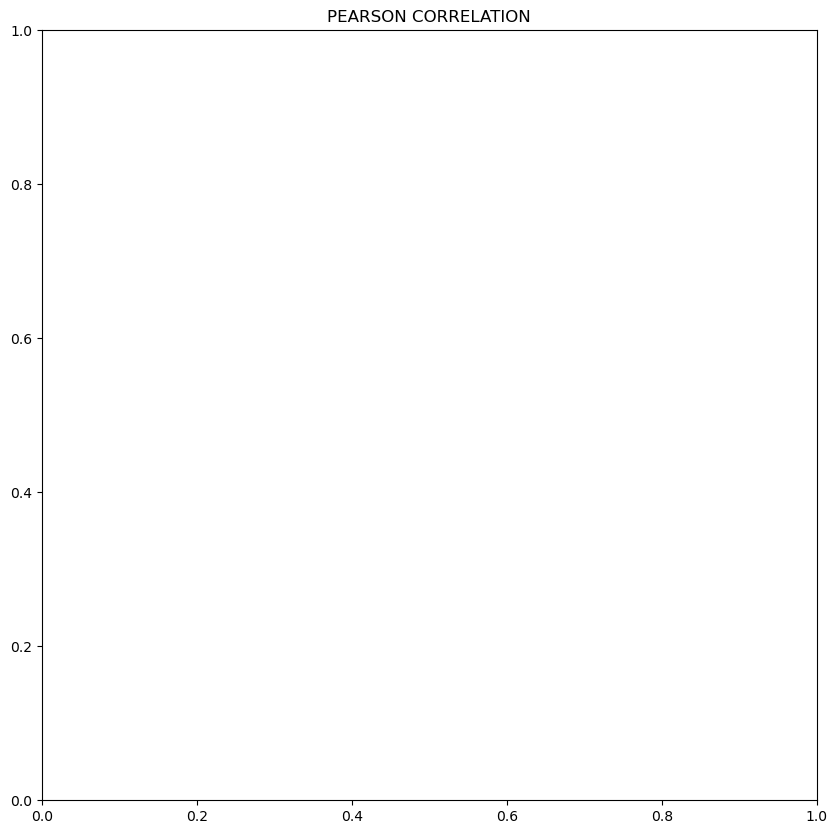

In [9]:
df_1_S1
# ENCONTRANDO COVARIÂNCIAS LINEARES
plt.figure(figsize=(10,10))
plt.title("PEARSON CORRELATION")
sns.heatmap(df_1_S1.drop(columns=['Amplitude Média','Amplitude Somatória','PSD Máximo','PSD Médio','PSD Somatória']).corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1);

In [60]:
v = np.linspace(-1, 1, 11, endpoint=True)
v

array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ])

<AxesSubplot:xlabel='Coeficientes Autoregressivos', ylabel='Coeficientes Autoregressivos'>

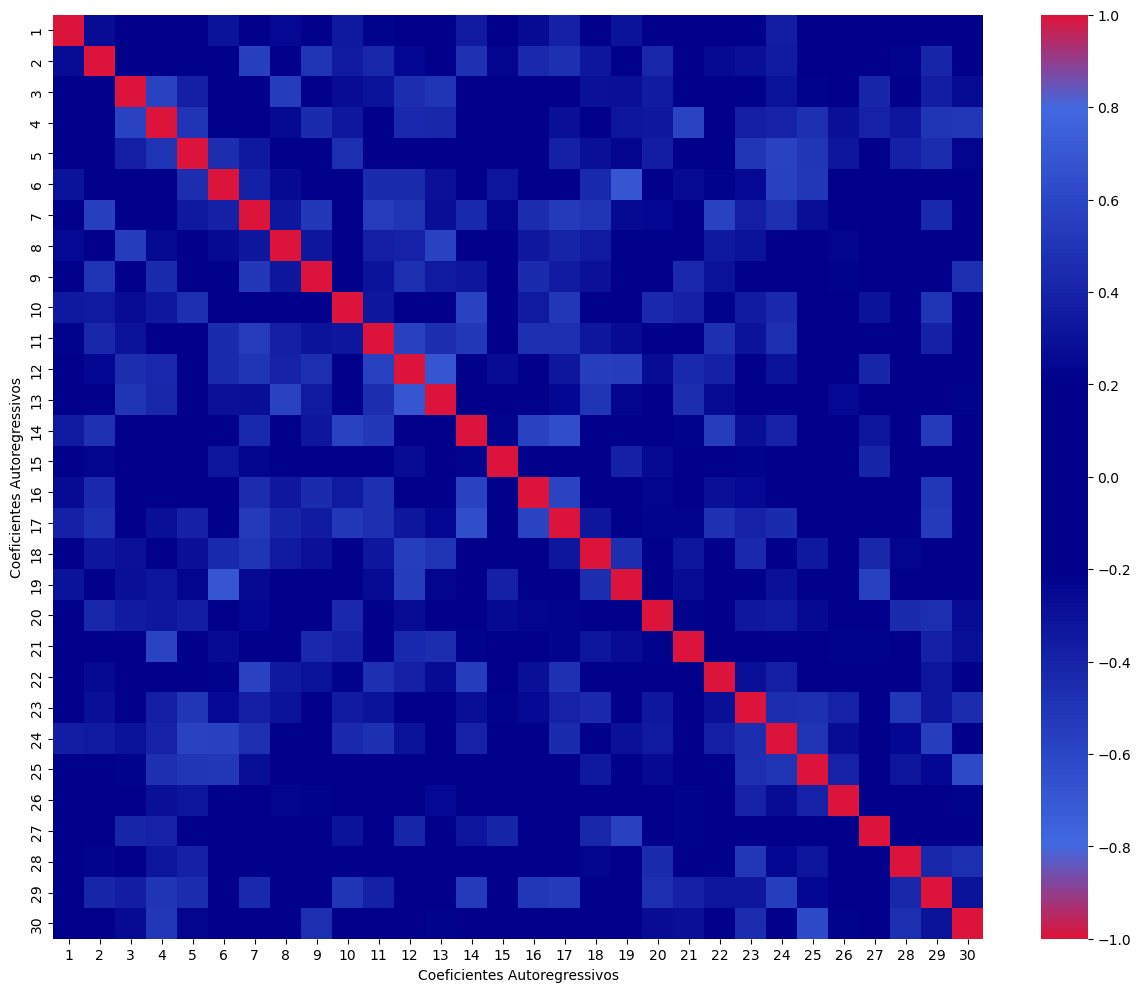

In [64]:
df_1_stat


# ENCONTRANDO COVARIÂNCIAS LINEARES
plt.figure(figsize=(15,12))
fig = sns.heatmap(df_1_stat.corr(), annot=False, annot_kws={'size': 15}, cbar_kws={'ticks': v}, cmap='pri_f', vmin=-1, vmax=1);
plt.xlabel('Coeficientes Autoregressivos');
plt.ylabel('Coeficientes Autoregressivos');
plt.savefig("corr_autoreg_stat.pdf", bbox_inches='tight');
fig

In [28]:
df_1_stat.corr()

""


<AxesSubplot:>

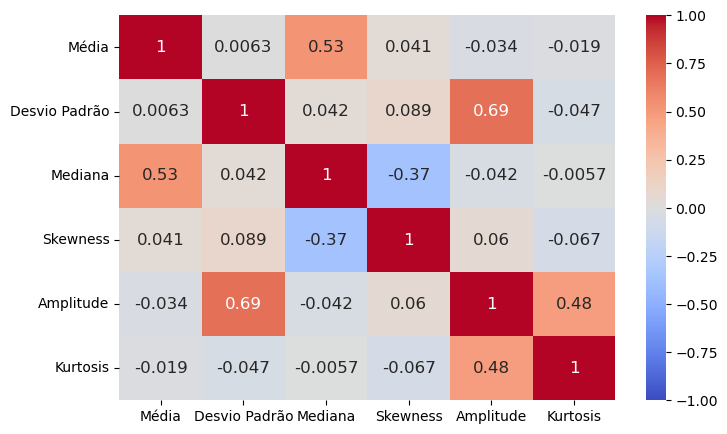

In [6]:
df_1_stat
# ENCONTRANDO COVARIÂNCIAS LINEARES
plt.figure(figsize=(8,5))
fig = sns.heatmap(df_1_stat.drop(columns=['Valor Mínimo','Valor Máximo']).corr(), annot=True, annot_kws={'size': 12}, cmap='coolwarm', vmin=-1, vmax=1);
plt.savefig("corr_filter_stat.pdf", bbox_inches='tight')
fig

<AxesSubplot:>

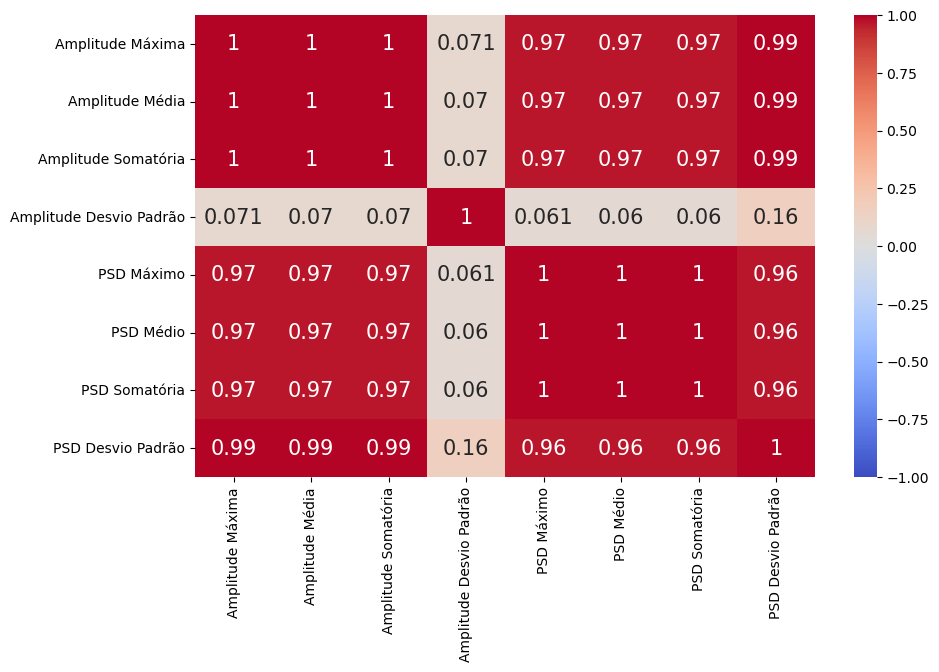

In [54]:
df_1_freq
# ENCONTRANDO COVARIÂNCIAS LINEARES
plt.figure(figsize=(10,6))
fig = sns.heatmap(df_1_freq.corr(), annot=True, annot_kws={'size': 15}, cmap='coolwarm', vmin=-1, vmax=1);
plt.savefig("corr_full_freq.pdf", format="pdf")
fig

<AxesSubplot:>

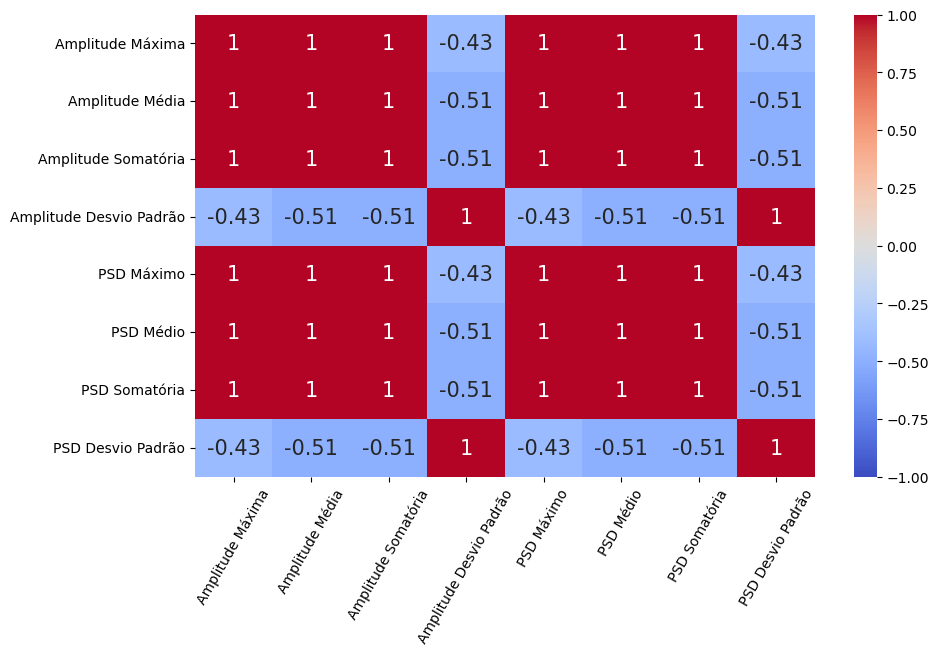

In [7]:
df_1_freq
# ENCONTRANDO COVARIÂNCIAS LINEARES
plt.figure(figsize=(10,6))
fig = sns.heatmap(df_1_freq.corr(), annot=True, annot_kws={'size': 15}, cmap='coolwarm', vmin=-1, vmax=1);
plt.xticks(rotation=60);
plt.savefig("corr_full_freq.pdf", bbox_inches='tight')

fig

<AxesSubplot:>

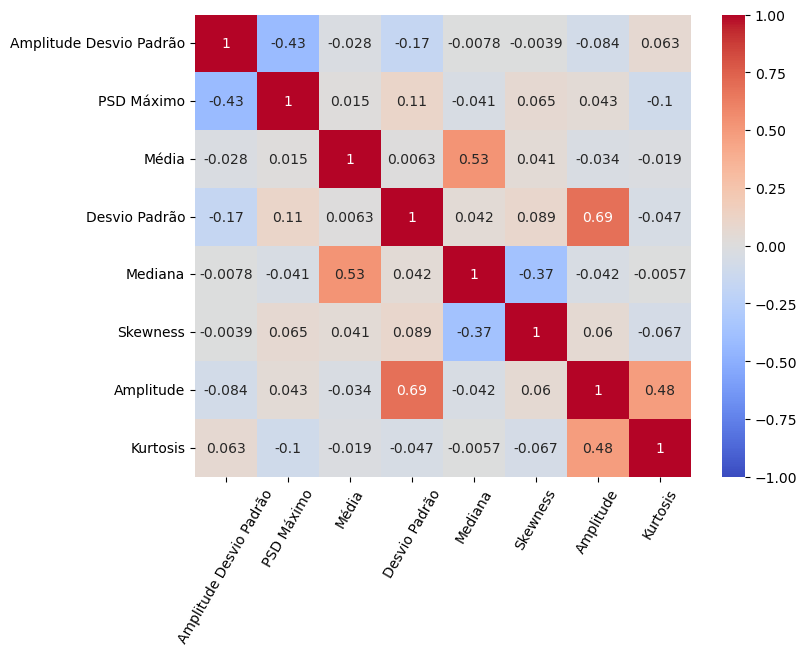

In [8]:
df_1_result
# ENCONTRANDO COVARIÂNCIAS LINEARES
plt.figure(figsize=(8,6))
fig = sns.heatmap(df_1_result.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1);
plt.xticks(rotation=60);
plt.savefig("corr_full_result.pdf", bbox_inches='tight')
fig

<AxesSubplot:>

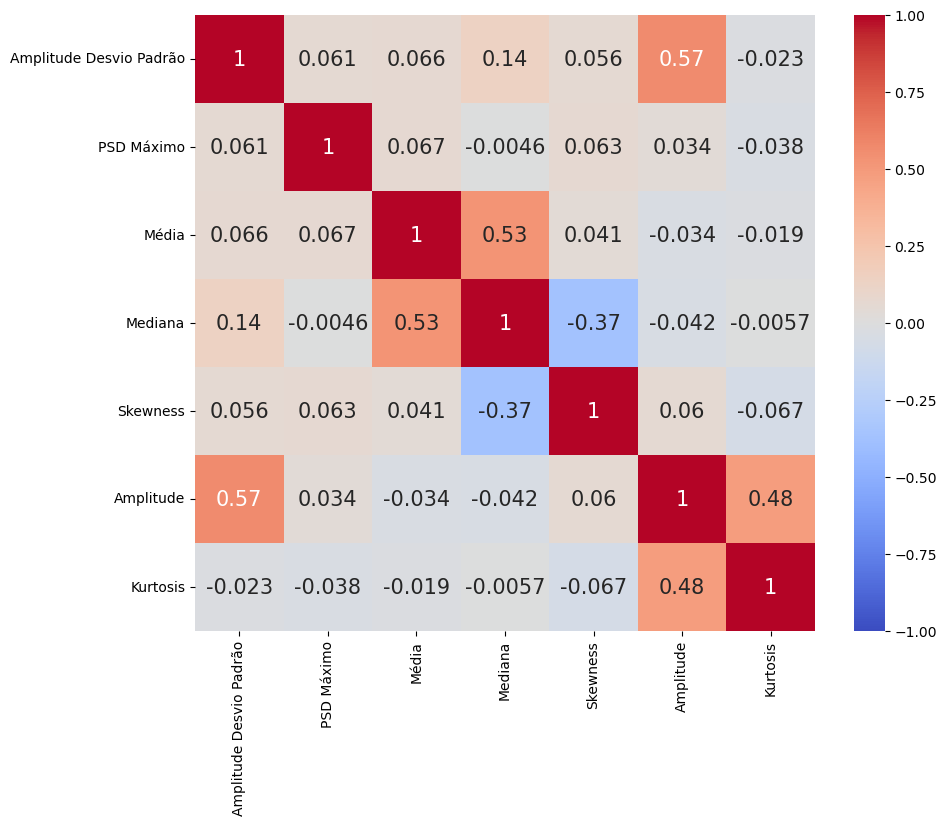

In [62]:
df_1_result
# ENCONTRANDO COVARIÂNCIAS LINEARES
plt.figure(figsize=(10,8))
fig = sns.heatmap(df_1_result.corr(), annot=True, annot_kws={'size': 15}, cmap='coolwarm', vmin=-1, vmax=1);
plt.savefig("corr_full_result.pdf", format="pdf")
fig

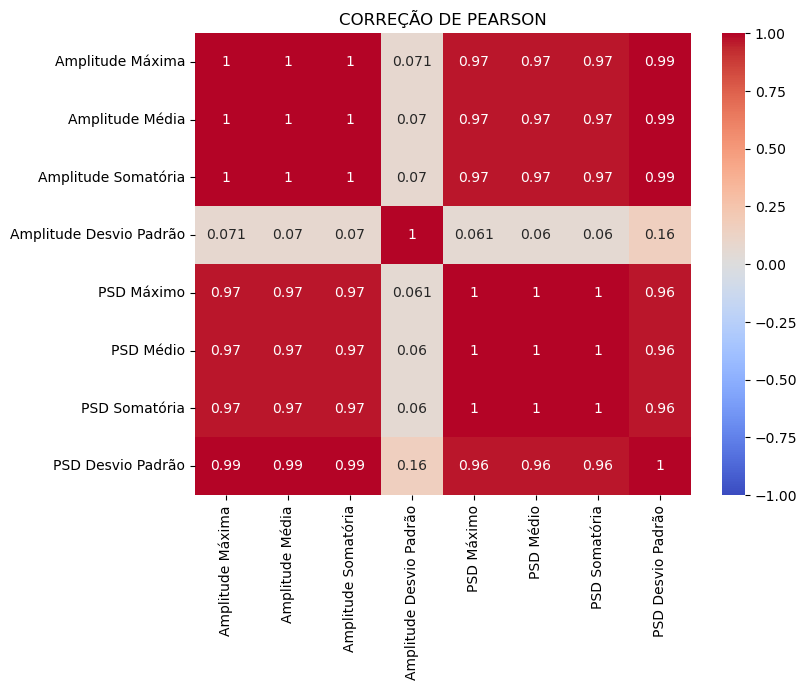

In [12]:
# ENCONTRANDO COVARIÂNCIAS LINEARES
plt.figure(figsize=(8,6))
plt.title("CORREÇÃO DE PEARSON")
sns.heatmap(df_1_freq.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1);


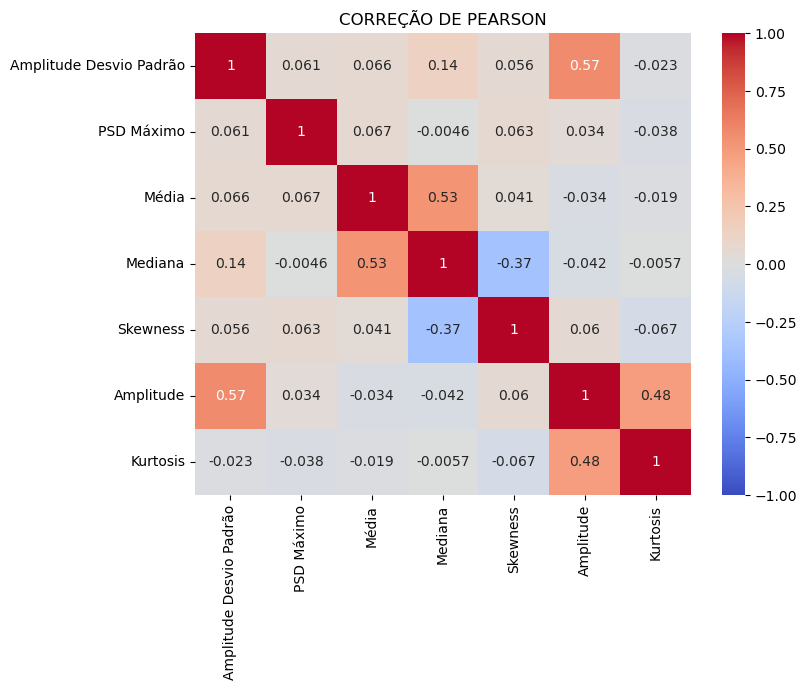

In [13]:
# ENCONTRANDO COVARIÂNCIAS LINEARES
plt.figure(figsize=(8,6))
plt.title("CORREÇÃO DE PEARSON")
sns.heatmap(df_1_result.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1);

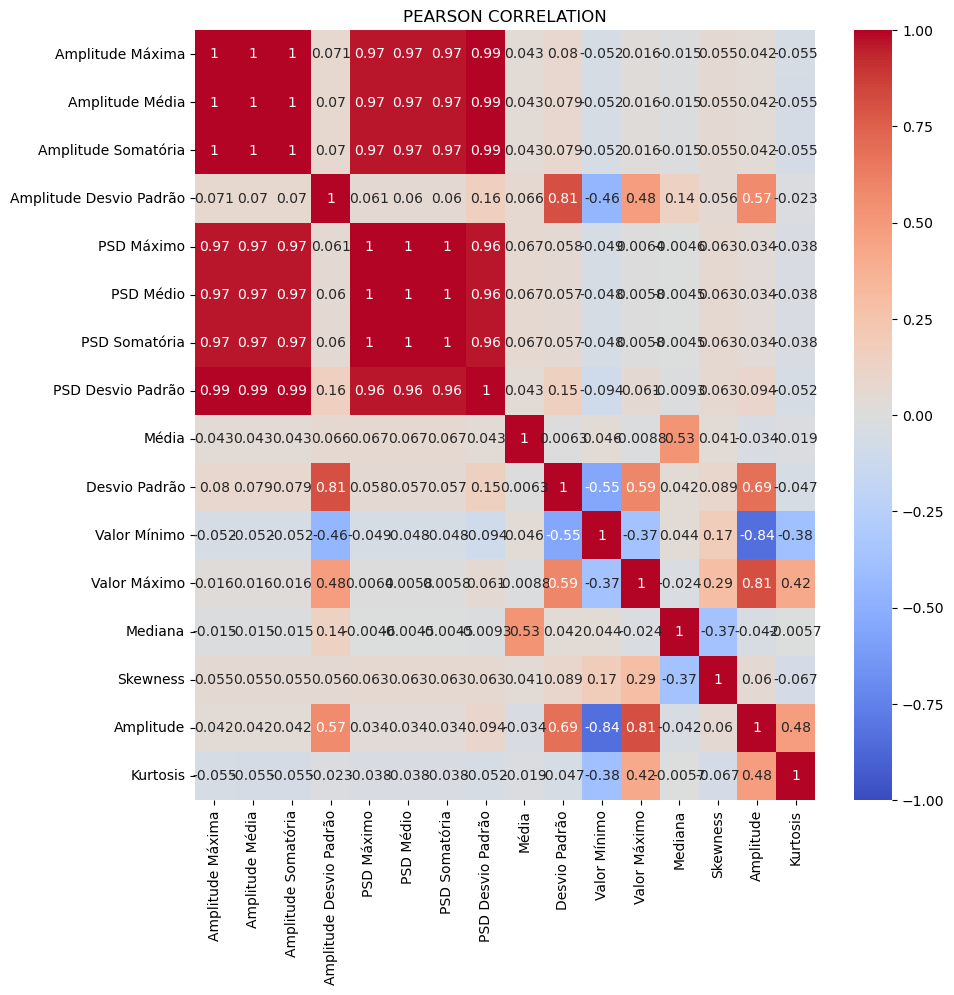

In [10]:
# ENCONTRANDO COVARIÂNCIAS LINEARES
plt.figure(figsize=(10,10))
plt.title("PEARSON CORRELATION")
sns.heatmap(df_1_S1.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1);

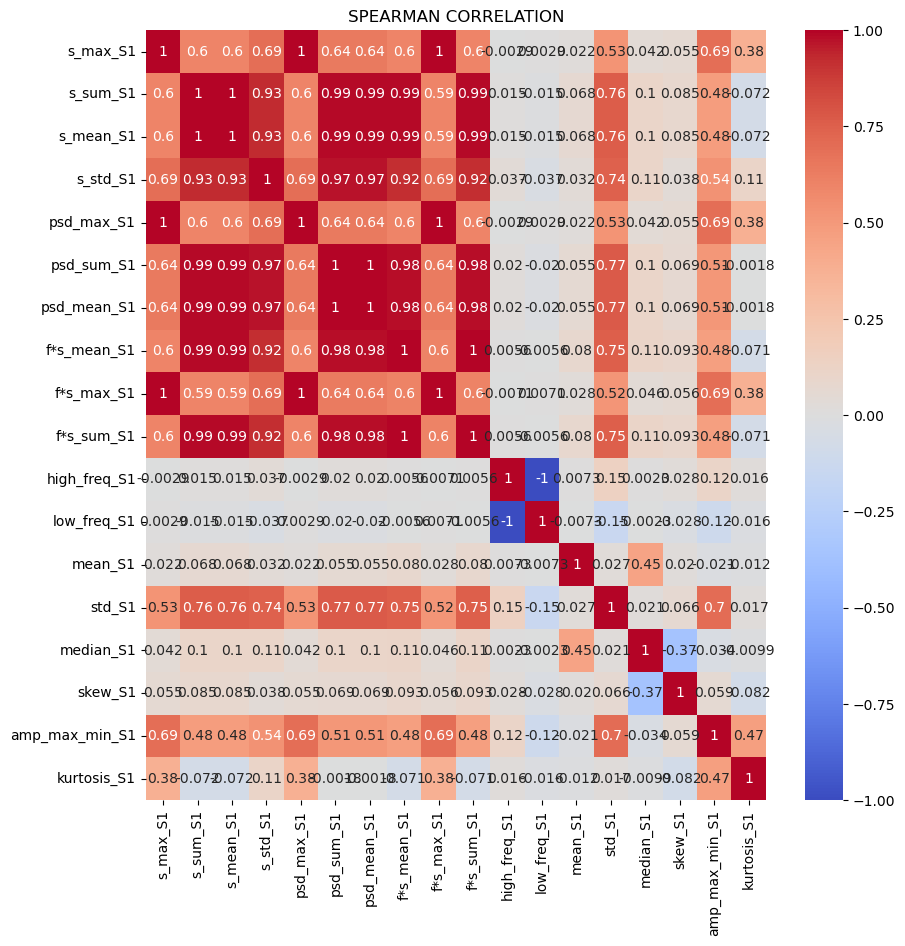

In [93]:
# ENCONTRANDO COVARIÂNCIAS QUADRÁTICAS
plt.figure(figsize=(10,10))
plt.title("SPEARMAN CORRELATION")
sns.heatmap(df_1_S1.corr(method= 'spearman'), annot=True, cmap='coolwarm', vmin=-1, vmax=1);

In [105]:
df_1_S1_clean = defs_.createDatabaseSingleSensor(df_simples.loc[df_simples['Scenario'] == '1'],1);
variation = 'S1';
df_1_S1_clean = df_1_S1_clean.drop(columns=['s_sum_'+variation,'psd_sum_'+variation,'f*s_sum_'+variation,'s_mean_'+variation,'psd_max_'+variation,'std_'+variation,'s_std_'+variation,'f*s_mean_'+variation,'f*s_max_'+variation]);
df_1_S1_clean = df_1_S1_clean.drop(columns=['damaged']).astype(float);
df_1_S1_clean

,s_max_S1,psd_mean_S1,high_freq_S1,low_freq_S1,mean_S1,median_S1,skew_S1,amp_max_min_S1,kurtosis_S1
0,0.000778,3.459908e-08,376.000963,0.002660,-0.001358,-0.002283,0.015408,0.993947,0.103656
1,0.000847,4.949225e-08,185.916709,0.005379,-0.000405,0.001573,-0.031585,0.930550,-0.101231
2,0.001177,4.696623e-08,121.945368,0.008200,0.002315,0.002927,-0.003201,1.337910,0.478070
3,0.001212,8.911312e-08,509.771622,0.001962,0.002870,0.007315,0.045592,1.307263,-0.361960
4,0.001390,8.053365e-08,184.917157,0.005408,0.001293,0.006328,-0.133435,1.341857,0.338595
...,...,...,...,...,...,...,...,...,...
251,0.000997,5.265665e-08,217.773438,0.004592,0.004145,0.008804,0.000720,0.997111,-0.144618
252,0.001011,5.099141e-08,322.265625,0.003103,0.005604,0.011559,-0.059467,0.989275,-0.033417
253,0.000825,3.924421e-08,65.429688,0.015284,0.003746,0.006686,-0.025000,0.855456,-0.281179
254,0.001178,6.602281e-08,192.382812,0.005198,0.001972,-0.002544,0.095663,1.143121,0.018956


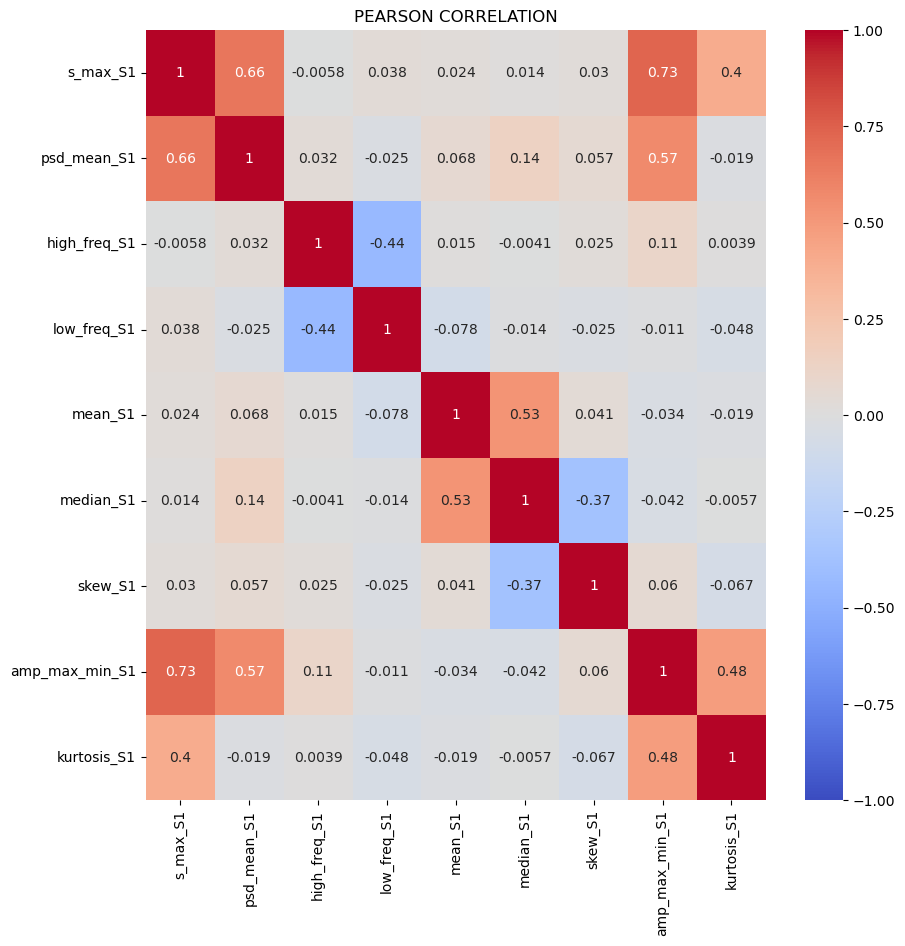

In [106]:
# ENCONTRANDO COVARIÂNCIAS LINEARES
plt.figure(figsize=(10,10))
plt.title("PEARSON CORRELATION")
sns.heatmap(df_1_S1_clean.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1);

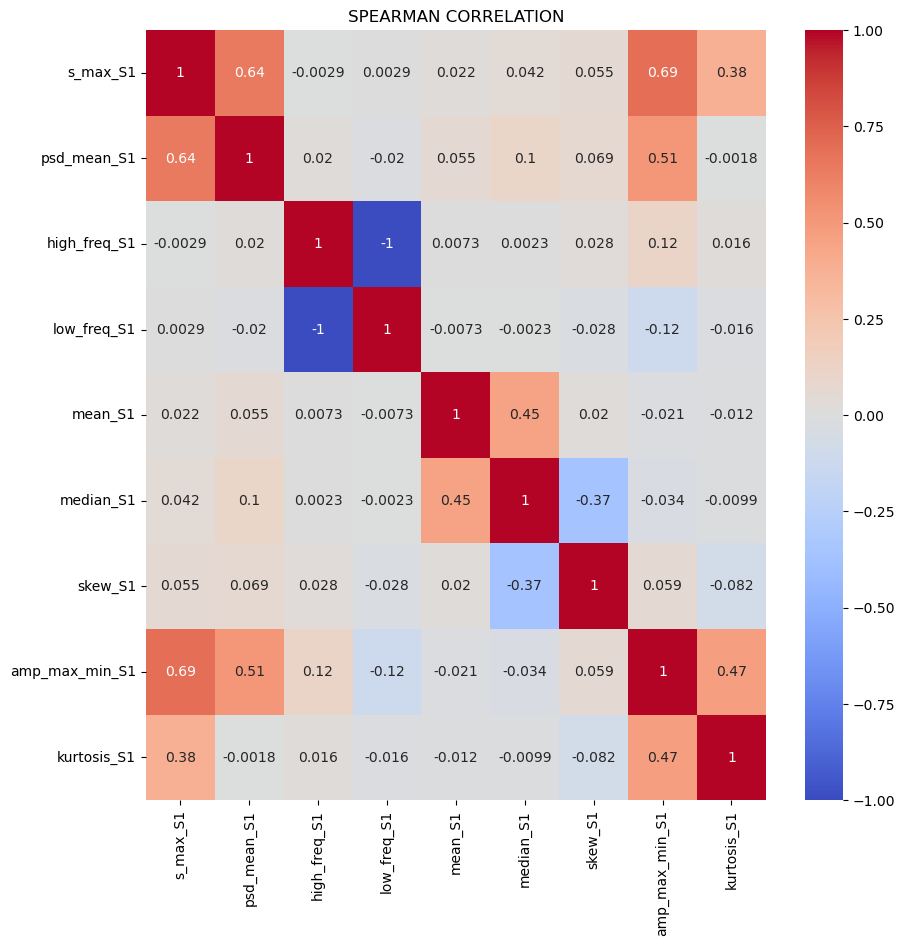

In [107]:
# ENCONTRANDO COVARIÂNCIAS QUADRÁTICAS
plt.figure(figsize=(10,10))
plt.title("SPEARMAN CORRELATION")
sns.heatmap(df_1_S1_clean.corr(method= 'spearman'), annot=True, cmap='coolwarm', vmin=-1, vmax=1);